# Stack Overflow Survey

> This is for the first project of the data scientist program of Udacity.  
> I retrieved Stack Overflow Survey - Multiple Years results to analyze trends over time  
> with 3 guiding questions:   
> 1) Overall changes of demographic and professional characteristics of survey participants
> 2) Programing languages preferred over time
> 3) Difference in programing language preference by global region and generation  
>
> The data for analyses are from https://insights.stackoverflow.com/survey

# Data Collection

> As I am completely new to this data set, I checked the overall structure of each dataframe,  
> found out common columns, and collected some of dataframes into one database for further analyses.

In [1]:
# Import modules
import numpy as np
import pandas as pd
import os
import re
import random
from fuzzywuzzy import fuzz

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import country_converter as coco
import missingno as msno

import warnings
warnings.filterwarnings(action='ignore')

import mozchart as moz

### Data Overview and Selection

* Make the list of database folders of current working directory

In [2]:
# Find out DB folder in current working directory
current_directory_DB = os.path.join(os.getcwd(), 'DB')

# From DB folder, find out subfolders of each year's DB and place them into a list
DB_folders = []
for i in os.listdir(current_directory_DB):
    sub_folder = os.path.join(current_directory_DB, i)
    if os.path.isdir(sub_folder):     
        DB_folders.append(sub_folder)
DB_folders.sort(reverse=True)
print (DB_folders)

['/Users/michael/workspace/u_city_1/DB/2022', '/Users/michael/workspace/u_city_1/DB/2021', '/Users/michael/workspace/u_city_1/DB/2020', '/Users/michael/workspace/u_city_1/DB/2019', '/Users/michael/workspace/u_city_1/DB/2018', '/Users/michael/workspace/u_city_1/DB/2017']


* Make dataframes of each year

In [3]:
# Make list of dataframes of survery_results_public.csv files
# Insert Survey_Year column to dataframes
DB_list = []
for i in DB_folders:
    df_year = str(i)[-4:]
    df_name = 'df_' + df_year # make name of dataframe with year information
    globals()[df_name] = pd.read_csv(os.path.join(i, 'survey_results_public.csv'))
    globals()[df_name].name = df_name
    globals()[df_name].insert(0, 'Survey_Year', df_year)
    DB_list.append(globals()[df_name])

* Simply check number of columns of each dataframe

In [4]:
for i in DB_list:
    print (i.name, 'has', i.shape[1], 'columns')

df_2022 has 80 columns
df_2021 has 49 columns
df_2020 has 62 columns
df_2019 has 86 columns
df_2018 has 130 columns
df_2017 has 155 columns


* Find out common columns in all dataframes, as dataframes are clearly different in shape  

In [5]:
common_columns = DB_list[0].columns
for i in DB_list:
    common_columns = common_columns.intersection(i.columns)
common_columns

Index(['Survey_Year', 'Country', 'Gender'], dtype='object')

> With widely different column numbers and only 3 columns commonly used throughout all survey years,  
> it is clear that dataframes have various shapes.

* Find out intersection columns between the latest survey (df_2022) and other surveys respectively  
to extract more common columns

In [6]:
for i in DB_list[1:]:
    common_columns = sorted(DB_list[0].columns.intersection(i.columns))
    print ('df_2022 and', i.name, 'have', len(common_columns), 'common column(s)')
    print (common_columns, '\n')

df_2022 and df_2021 have 43 common column(s)
['Accessibility', 'Age', 'CompFreq', 'CompTotal', 'ConvertedCompYearly', 'Country', 'Currency', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LearnCode', 'MainBranch', 'MentalHealth', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWSOSites', 'OrgSize', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'ResponseId', 'SOAccount', 'SOComm', 'SOPartFreq', 'SOVisitFreq', 'Sexuality', 'SurveyEase', 'SurveyLength', 'Survey_Year', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'Trans', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'YearsCode', 'YearsCodePro'] 

df_2022 and df_2020 have 23 common column(s)
['Age', 'CompFreq', 'CompTotal', 'Country', 'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'MainBranch', 'NEWSOSites', 'OrgSize', 'SO

* Check if 22 intersection columns between df_2022 and df_2019 are completely in df_2021 and df_2020

In [7]:
common_columns_2022_2019 = ['Age', 'CompFreq', 'CompTotal', 'Country', 'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'MainBranch', 'OrgSize', 'SOAccount',
'SOComm','SOPartFreq', 'SOVisitFreq', 'Sexuality', 'SurveyEase', 'SurveyLength', 'Survey_Year', 'Trans', 'YearsCode', 'YearsCodePro']
for i in DB_list[1:3]:
    common_columns = sorted(i.columns.intersection(common_columns_2022_2019))
    print (i.name, 'has', len(common_columns), 'out of 22 intersection columns between df_2022 and df_2019')
    print (common_columns, '\n')

df_2021 has 22 out of 22 intersection columns between df_2022 and df_2019
['Age', 'CompFreq', 'CompTotal', 'Country', 'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'MainBranch', 'OrgSize', 'SOAccount', 'SOComm', 'SOPartFreq', 'SOVisitFreq', 'Sexuality', 'SurveyEase', 'SurveyLength', 'Survey_Year', 'Trans', 'YearsCode', 'YearsCodePro'] 

df_2020 has 22 out of 22 intersection columns between df_2022 and df_2019
['Age', 'CompFreq', 'CompTotal', 'Country', 'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'MainBranch', 'OrgSize', 'SOAccount', 'SOComm', 'SOPartFreq', 'SOVisitFreq', 'Sexuality', 'SurveyEase', 'SurveyLength', 'Survey_Year', 'Trans', 'YearsCode', 'YearsCodePro'] 



> With 22 common columns, dataframes from 2019 to 2022 seem to have more similarity.  
> It might be better exclude dataframes of 2017 and 2018 in further analyses,  
> as wrangling with these old databases can be too much complicated considering its benefit.

### Detail Check and Collection 

* Verify if 22 common columns have meaningful information by checking corresponding questions in schema file

In [8]:
# Make dataframe of survery_results_schema.csv from 2022 DB
df_2022_schema = pd.read_csv(os.path.join(DB_folders[0], 'survey_results_schema.csv'))
df_2022_schema.head(10)

,qid,qname,question,force_resp,type,selector
0,QID16,S0,"<div><span style=""font-size:19px;""><strong>Hel...",False,DB,TB
1,QID12,MetaInfo,Browser Meta Info,False,Meta,Browser
2,QID1,S1,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
3,QID2,MainBranch,Which of the following options best describes ...,True,MC,SAVR
4,QID296,Employment,Which of the following best describes your cur...,False,MC,MAVR
5,QID308,RemoteWork,Which best describes your current work situation?,False,MC,SAVR
6,QID297,CodingActivities,Which of the following best describes the code...,False,MC,MAVR
7,QID190,S2,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
8,QID25,EdLevel,Which of the following best describes the high...,False,MC,SAVR
9,QID276,LearnCode,How did you learn to code? Select all that apply.,False,MC,MAVR


In [9]:
# Extract corresponding questions of 22 common columns with 'qname' as a link
pd.set_option('display.max_colwidth', None)
for i in common_columns_2022_2019:
    question_text = df_2022_schema[df_2022_schema.qname == i].question
    print (i, ":", question_text)

Age : 44    What is your age?
Name: question, dtype: object
CompFreq : 21    Is that compensation weekly, monthly, or yearly?
Name: question, dtype: object
CompTotal : 20    What is your current total compensation (salary, bonuses, and perks, before taxes and deductions)? Please enter a whole number in the box below, without any punctuation.  If you are paid hourly, please estimate an equivalent weekly, monthly, or yearly salary. If you prefer not to answer, please leave the box empty.
Name: question, dtype: object
Country : 18    Where do you live? <span style="font-weight: bolder;">*</span>
Name: question, dtype: object
DevType : 14    Which of the following describes your current job? Please select all that apply.
Name: question, dtype: object
EdLevel : 8    Which of the following best describes the highest level of formal education that you’ve completed? *
Name: question, dtype: object
Employment : 4    Which of the following best describes your current employment status?
Name: que

> 22 common columns have demographic, professional and survey-related information.  
> But information on language and technology is missing.

* View all columns of df_2022 to find out columns relevant to programming language.

In [10]:
pd.set_option('display.max_rows', None)
np.transpose(df_2022.sample(5)).reset_index()

,index,31124,6245,61644,68296,33842
0,Survey_Year,2022,2022,2022,2022,2022
1,ResponseId,31125,6246,61645,68297,33843
2,MainBranch,I am a developer by profession,I am a developer by profession,I am a developer by profession,I am a developer by profession,I am a developer by profession
3,Employment,"Student, full-time","Employed, full-time;Student, full-time;Employed, part-time","Employed, full-time","Employed, full-time","Employed, full-time"
4,RemoteWork,NaN,"Hybrid (some remote, some in-person)",Fully remote,Fully remote,Fully remote
5,CodingActivities,NaN,Hobby;Contribute to open-source projects;School or academic work,I don’t code outside of work,I don’t code outside of work,Hobby;School or academic work
6,EdLevel,"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)"
7,LearnCode,"Other online resources (e.g., videos, blogs, forum);Online Courses or Certification","Other online resources (e.g., videos, blogs, forum)","School (i.e., University, College, etc);On the job training;Online Courses or Certification","Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc);On the job training;Colleague","Friend or family member;Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc);On the job training;Online Courses or Certification;Coding Bootcamp"
8,LearnCodeOnline,Stack Overflow;Video-based Online Courses;How-to videos,Technical documentation;Blogs;Written Tutorials;Stack Overflow;Online books;Online forum;Interactive tutorial,NaN,Technical documentation;Blogs;Written Tutorials;Written-based Online Courses;Interactive tutorial,"Technical documentation;Blogs;Video-based Online Courses;Online challenges (e.g., daily or weekly coding challenges);How-to videos"
9,LearnCodeCoursesCert,Coursera;Udemy,NaN,Coursera;Udemy;Codecademy,NaN,Coursera;Udemy;Codecademy


> There are about 20 language and technology-related columns in df_2022.  
> For further analyses, I manually - as I am completely new to this data set -  
> checked and found out the most similar columns.  

**[FUNCTION]** extract_column_contents

In [11]:
# Function [extract_column_contents] to make list of unique and not duplicated contents from a column.  
# This is to facilitate manual checking. 

def extract_column_contents (df, column_name):
    '''
    INPUT
    column_name : str, name of column to make list of unique and not duplicated contents from
    df : name of dataframe containing column
    OUTPUT
    list of unique and not duplicated contents from a column
    '''

    # make a set containing unique values of a column
    column_contents_unique = set(df[column_name].dropna().unique())

    # make a set containing not duplicated contents from values of contents_set_unique above
    column_contents_unique_notduplicated = set() 
    for i in column_contents_unique:
        try:
            devided_contents = re.split('[,;]', i)
            for j in devided_contents:
                column_contents_unique_notduplicated.add(str(j).lower())
        except:
            column_contents_unique_notduplicated.add(str(i).lower())

    column_contents_extracted = list(sorted(column_contents_unique_notduplicated))
    return df.name, column_name, column_contents_extracted

**[FUNCTION]** compare_column_contents

In [12]:
# Function [compare_column_contents] to check similatiry in column contnets and names.  
# This is to facilitate manual checking. 

def compare_column_contents(column_to_check, base_df = df_2022, dfs_to_compare = [df_2021, df_2020, df_2019]):
    '''
    INPUT
    column_to_check : str, name of column to check similatiry of its name and contents with other columns
    base_df : name of dataframe containing column_to_check
    dfs_to_compare : list of dataframes to be compared
    OUTPUT
    3 columns with most similarity in contents to column_to check and similarity of their column names    
    '''
    base_contents = extract_column_contents (df = base_df, column_name = column_to_check)
    print (base_contents[0], base_contents[1])
    print (base_contents[2], '\n')

    dfs_to_compare = dfs_to_compare
    for df in dfs_to_compare:
        
        fuzz_ratio_contents, fuzz_ratio_column_name, column_contents = {}, {}, {}

        for col in df:
            contents_to_compare = extract_column_contents (df, col)
            fuzz_ratio_contents[col] = fuzz.token_set_ratio(base_contents[2], contents_to_compare[2])
            fuzz_ratio_column_name[col] = fuzz.ratio(base_contents[1], contents_to_compare[1])
            column_contents[col] = contents_to_compare[2]
        fuzz_ratio_contents = sorted(fuzz_ratio_contents.items(), key=lambda x:x[1], reverse=True)

        print (df.name)
        for i in range(3):

            column_name = fuzz_ratio_contents[i][0]

            print ('*     *     *')
            print ('Similarity of column name:', fuzz_ratio_column_name[column_name], column_name)
            print ('Similarity of column contents:', fuzz_ratio_contents[i][1])
            print (column_contents[column_name])
        print ('\n')

* For LanguageHaveWorkedWith of df_2022, find out columns having similarity in column name and contents.  
  And change column names after manual checking. 

In [13]:
compare_column_contents('LanguageHaveWorkedWith')

df_2022 LanguageHaveWorkedWith
['apl', 'assembly', 'bash/shell', 'c', 'c#', 'c++', 'clojure', 'cobol', 'crystal', 'dart', 'delphi', 'elixir', 'erlang', 'f#', 'fortran', 'go', 'groovy', 'haskell', 'html/css', 'java', 'javascript', 'julia', 'kotlin', 'lisp', 'lua', 'matlab', 'objective-c', 'ocaml', 'perl', 'php', 'powershell', 'python', 'r', 'ruby', 'rust', 'sas', 'scala', 'solidity', 'sql', 'swift', 'typescript', 'vba'] 

df_2021
*     *     *
Similarity of column name: 100 LanguageHaveWorkedWith
Similarity of column contents: 98
['apl', 'assembly', 'bash/shell', 'c', 'c#', 'c++', 'clojure', 'cobol', 'crystal', 'dart', 'delphi', 'elixir', 'erlang', 'f#', 'go', 'groovy', 'haskell', 'html/css', 'java', 'javascript', 'julia', 'kotlin', 'lisp', 'matlab', 'node.js', 'objective-c', 'perl', 'php', 'powershell', 'python', 'r', 'ruby', 'rust', 'scala', 'sql', 'swift', 'typescript', 'vba']
*     *     *
Similarity of column name: 77 LanguageWantToWorkWith
Similarity of column contents: 98
['apl',

In [14]:
df_2020.rename(columns={'LanguageWorkedWith':'LanguageHaveWorkedWith'}, inplace = True)
df_2019.rename(columns={'LanguageWorkedWith':'LanguageHaveWorkedWith'}, inplace = True)

* For LanguageWantToWorkWith of df_2022, find out columns having similarity in column name and contents.  
  And change column names after manual checking. 

In [15]:
compare_column_contents('LanguageWantToWorkWith')

df_2022 LanguageWantToWorkWith
['apl', 'assembly', 'bash/shell', 'c', 'c#', 'c++', 'clojure', 'cobol', 'crystal', 'dart', 'delphi', 'elixir', 'erlang', 'f#', 'fortran', 'go', 'groovy', 'haskell', 'html/css', 'java', 'javascript', 'julia', 'kotlin', 'lisp', 'lua', 'matlab', 'objective-c', 'ocaml', 'perl', 'php', 'powershell', 'python', 'r', 'ruby', 'rust', 'sas', 'scala', 'solidity', 'sql', 'swift', 'typescript', 'vba'] 

df_2021
*     *     *
Similarity of column name: 77 LanguageHaveWorkedWith
Similarity of column contents: 98
['apl', 'assembly', 'bash/shell', 'c', 'c#', 'c++', 'clojure', 'cobol', 'crystal', 'dart', 'delphi', 'elixir', 'erlang', 'f#', 'go', 'groovy', 'haskell', 'html/css', 'java', 'javascript', 'julia', 'kotlin', 'lisp', 'matlab', 'node.js', 'objective-c', 'perl', 'php', 'powershell', 'python', 'r', 'ruby', 'rust', 'scala', 'sql', 'swift', 'typescript', 'vba']
*     *     *
Similarity of column name: 100 LanguageWantToWorkWith
Similarity of column contents: 98
['apl',

In [16]:
df_2020.rename(columns={'LanguageDesireNextYear':'LanguageWantToWorkWith'}, inplace = True)
df_2019.rename(columns={'LanguageDesireNextYear':'LanguageWantToWorkWith'}, inplace = True)

* For DatabaseHaveWorkedWith / DatabaseWantToWorkWith of df_2022, find out columns having similarity in column name and contents.  
And change column names after manual checking. 

In [17]:
compare_column_contents('DatabaseHaveWorkedWith')

df_2022 DatabaseHaveWorkedWith
['cassandra', 'cloud firestore', 'couchbase', 'couchdb', 'dynamodb', 'elasticsearch', 'firebase realtime database', 'ibm db2', 'mariadb', 'microsoft sql server', 'mongodb', 'mysql', 'neo4j', 'oracle', 'postgresql', 'redis', 'sqlite'] 

df_2021
*     *     *
Similarity of column name: 100 DatabaseHaveWorkedWith
Similarity of column contents: 100
['cassandra', 'couchbase', 'dynamodb', 'elasticsearch', 'firebase', 'ibm db2', 'mariadb', 'microsoft sql server', 'mongodb', 'mysql', 'oracle', 'postgresql', 'redis', 'sqlite']
*     *     *
Similarity of column name: 77 DatabaseWantToWorkWith
Similarity of column contents: 100
['cassandra', 'couchbase', 'dynamodb', 'elasticsearch', 'firebase', 'ibm db2', 'mariadb', 'microsoft sql server', 'mongodb', 'mysql', 'oracle', 'postgresql', 'redis', 'sqlite']
*     *     *
Similarity of column name: 73 PlatformHaveWorkedWith
Similarity of column contents: 44
['aws', 'digitalocean', 'google cloud platform', 'heroku', 'ibm c

In [18]:
df_2020.rename(columns={'DatabaseWorkedWith':'DatabaseHaveWorkedWith'}, inplace = True)
df_2019.rename(columns={'DatabaseWorkedWith':'DatabaseHaveWorkedWith'}, inplace = True)

In [19]:
df_2020.rename(columns={'DatabaseDesireNextYear':'DatabaseWantToWorkWith'}, inplace = True)
df_2019.rename(columns={'DatabaseDesireNextYear':'DatabaseWantToWorkWith'}, inplace = True)

> After including 4 language-related columns, I finally checked   
> if total 26 common columns are completely in dataframes form 2019 to 2022  
> to make collected database for further analyses.

In [20]:
for i in DB_list[1:]:
    common_columns = sorted(DB_list[0].columns.intersection(i.columns))
    print ('df_2022 and', i.name, 'have', len(common_columns), 'common column(s)')
    print (common_columns, '\n')

df_2022 and df_2021 have 43 common column(s)
['Accessibility', 'Age', 'CompFreq', 'CompTotal', 'ConvertedCompYearly', 'Country', 'Currency', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LearnCode', 'MainBranch', 'MentalHealth', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWSOSites', 'OrgSize', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'ResponseId', 'SOAccount', 'SOComm', 'SOPartFreq', 'SOVisitFreq', 'Sexuality', 'SurveyEase', 'SurveyLength', 'Survey_Year', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'Trans', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'YearsCode', 'YearsCodePro'] 

df_2022 and df_2020 have 27 common column(s)
['Age', 'CompFreq', 'CompTotal', 'Country', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DevType', 'EdLevel', 'Employment', 'Ethnicity', 

In [21]:
common_columns_2022_2019 = ['Age', 'CompFreq', 'CompTotal', 'Country', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
                            'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'LanguageHaveWorkedWith',
                            'LanguageWantToWorkWith', 'MainBranch', 'OrgSize', 'SOAccount', 'SOComm', 'SOPartFreq',
                            'SOVisitFreq', 'Sexuality', 'SurveyEase', 'SurveyLength', 'Survey_Year', 'Trans',
                            'YearsCode', 'YearsCodePro']
for i in DB_list[1:3]:
    common_columns = sorted(i.columns.intersection(common_columns_2022_2019))
    print (i.name, 'has', len(common_columns), 'out of 26 intersection columns between df_2022 and df_2019')
    print (common_columns, '\n')

df_2021 has 26 out of 26 intersection columns between df_2022 and df_2019
['Age', 'CompFreq', 'CompTotal', 'Country', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'MainBranch', 'OrgSize', 'SOAccount', 'SOComm', 'SOPartFreq', 'SOVisitFreq', 'Sexuality', 'SurveyEase', 'SurveyLength', 'Survey_Year', 'Trans', 'YearsCode', 'YearsCodePro'] 

df_2020 has 26 out of 26 intersection columns between df_2022 and df_2019
['Age', 'CompFreq', 'CompTotal', 'Country', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'MainBranch', 'OrgSize', 'SOAccount', 'SOComm', 'SOPartFreq', 'SOVisitFreq', 'Sexuality', 'SurveyEase', 'SurveyLength', 'Survey_Year', 'Trans', 'YearsCode', 'YearsCodePro'] 



* Make copied dataframes of 26 common columns containing survey results from 2019 to 2022  
and concatenate copied dataframes to have collected DB

In [22]:
dfs_to_copy = [df_2022, df_2021, df_2020, df_2019]
dfs_to_concatenate = []
for df in dfs_to_copy:
    df_name = df.name + '_copy'
    globals()[df_name] = df[common_columns_2022_2019]
    globals()[df_name].name = df_name
    dfs_to_concatenate.append(globals()[df_name])

In [23]:
df = pd.concat(dfs_to_concatenate, ignore_index = True)
df.shape

(310051, 26)

# Trend Analyses
> From collected dataset above, I analyzed 3 initial questions after pre-processing:   
> * overall changes of demographic and professional characteristics
> * programing languages preferred
> * difference in programing language preference by global region and generation  

### Pre-processing

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310051 entries, 0 to 310050
Data columns (total 26 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Age                     278009 non-null  object 
 1   CompFreq                199912 non-null  object 
 2   CompTotal               176376 non-null  float64
 3   Country                 308033 non-null  object 
 4   DatabaseHaveWorkedWith  255230 non-null  object 
 5   DatabaseWantToWorkWith  222530 non-null  object 
 6   DevType                 258491 non-null  object 
 7   EdLevel                 298518 non-null  object 
 8   Employment              306067 non-null  object 
 9   Ethnicity               271554 non-null  object 
 10  Gender                  289102 non-null  object 
 11  LanguageHaveWorkedWith  298279 non-null  object 
 12  LanguageWantToWorkWith  282049 non-null  object 
 13  MainBranch              309200 non-null  object 
 14  OrgSize             

**[FUNCTION]** unique_type

In [25]:
# function [unique_type] to simply see unique values and data type(s) of column

def unique_type (column_name, str_sort = True, df_name = df):
    '''
    INPUT
    column_name : str, name of column
    str_sort : True as dafault
        True to show unique values of column changed to type str and sorted
        False to show unique values and data type(s) of column
    df_name : df as default, name of dataframe
    OUTPUT
    unique values of column changed to type str and sorted if str_sort is True, 
    or unique values of column if str_sort is False, 
    and value counts of data type(s) of column
    '''
    print ('Column', column_name)
    if str_sort:
        print ('str Values Sorted :', '\n', df_name[column_name].astype(str).sort_values().unique())
    else:
        print ('Unique Values :', '\n', df_name[column_name].unique())    
    print (df_name[column_name].apply(type).value_counts())

* Pre-processing : Age

In [26]:
unique_type('Age', False)

Column Age
Unique Values : 
 [nan '25-34 years old' '35-44 years old' 'Under 18 years old'
 '18-24 years old' '45-54 years old' '55-64 years old' '65 years or older'
 'Prefer not to say' 25.0 31.0 36.0 30.0 22.0 23.0 49.0 53.0 27.0 45.0
 32.0 24.0 40.0 18.0 39.0 29.0 16.0 34.0 19.0 35.0 20.0 38.0 57.0 28.0
 17.0 44.0 21.0 48.0 26.0 42.0 55.0 37.0 50.0 41.0 64.0 63.0 33.0 43.0
 51.0 60.0 59.0 62.0 69.0 52.0 46.0 49.5 56.0 47.0 15.0 72.0 13.0 71.0
 54.0 70.0 11.0 14.0 61.0 26.8 86.0 58.0 67.0 94.0 65.0 66.0 84.0 73.0
 78.0 68.0 99.0 74.0 12.0 77.0 15.5 85.0 76.0 35.7 32.5 81.0 23.8 97.0
 96.0 26.5 3.0 24.5 14.7 34.5 5.0 1.0 20.5 79.0 279.0 22.5 27.5 32.8 10.0
 89.0 80.0 98.0 19.8 7.0 21.5 31.5 88.0 39.5 16.5 75.0 83.0 23.4 95.0 14.5
 23.9 17.5 46.5 29.5 26.3 36.8 14.1 13.5 19.5 43.5 28.5 33.6 2.0 38.5 30.8
 24.8 90.0 61.3 4.0 17.3 19.9 23.5 16.9 20.9 91.0 98.9 57.9 9.0 37.5 82.0
 37.3 33.5 53.8 31.4 87.0]
<class 'float'>    156698
<class 'str'>      153353
Name: Age, dtype: int64


**[FUNCTION]** age_grouping

In [27]:
# Function [age_grouping] to pre-process age data into 7 age groups,
# as column Age has 3 data types - age groups in str, age numbers in str and in float

def age_grouping(age_value):
    '''
    INPUT
    age_value : values of column Age
    OUTPUT
    7 age groups
    '''    
    age_group_given = [
        '25-34 years old', '35-44 years old', 'Under 18 years old', '18-24 years old',
        '45-54 years old', '55-64 years old', '65 years or older', 'Prefer not to say']
    age_group_to_be = ['25-34', '35-44', '00-17', '18-24', '45-54', '55-64', '65-99', None]

    age_bins = [18, 25, 35, 45, 55, 65, np.inf]
    age_bins_label = ['00-17', '18-24', '25-34', '35-44', '45-54', '55-64', '65-99']

    if age_value in age_group_given: # Allocate age group values to cells with grouped value 
        for i, j in zip (age_group_given, age_group_to_be):
            if i == age_value:
                return j
    
    elif float(age_value) < 10 or float(age_value) > 99: # Allocate None to unreasonable values (under 10 or over 99) 
        return None
    
    else: 
        for i, j in zip (age_bins, age_bins_label): # Allocate age group values to cells with numeric value
            if i > float(age_value):
                return j
                break

In [28]:
df['Age_Group'] = df.Age.apply(age_grouping)
unique_type('Age_Group')

Column Age_Group
str Values Sorted : 
 ['00-17' '18-24' '25-34' '35-44' '45-54' '55-64' '65-99' 'None']
<class 'str'>         276869
<class 'NoneType'>     33182
Name: Age_Group, dtype: int64


* Pre-processing : Country

In [29]:
unique_type('Country')

Column Country
str Values Sorted : 
 ['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Congo, Republic of the...' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czech Republic' "Côte d'Ivoire" "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Eritrea' 'Estonia'
 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany'
 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea' 'Guyana' 'Haiti'
 'Honduras' 'Hong Kong (S.A.R.)' 'Hungary' 'Iceland' 'India' 'Indonesia'
 'Iran' 'Iran, Islam

In [30]:
# As some values have 2 or more expressions - ex) United States and Unites States of America,
# use country_converter module to make column County_Name with unified values.
# Use country_converter module to make column Continent.

country_list = []

for i in df['Country'].dropna().sort_values().unique():
    try:
        country_list.append([i, coco.convert(names = i, to = 'name_short'), coco.convert(names = i, to = 'continent')])
    except:
        country_list.append([i, None, None])

Nomadic not found in regex
Nomadic not found in regex
Other Country (Not Listed Above) not found in regex
Other Country (Not Listed Above) not found in regex


In [31]:
country_df = pd.DataFrame(country_list, columns = ['Country', 'Country_Name', 'Continent'])
df = pd.merge(df, country_df)
df.replace({'Country_Name' : {'not found' : None}}, inplace = True)

In [32]:
df.head()

,Age,CompFreq,CompTotal,Country,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DevType,EdLevel,Employment,Ethnicity,...,Sexuality,SurveyEase,SurveyLength,Survey_Year,Trans,YearsCode,YearsCodePro,Age_Group,Country_Name,Continent
0,NaN,NaN,NaN,Canada,NaN,NaN,NaN,NaN,"Employed, full-time",NaN,...,NaN,Difficult,Too long,2022,NaN,NaN,NaN,None,Canada,America
1,35-44 years old,Yearly,125000.0,Canada,Microsoft SQL Server;PostgreSQL;Redis,Microsoft SQL Server;PostgreSQL,"Developer, back-end",Something else,"Employed, full-time",White;North American,...,Straight / Heterosexual,Neither easy nor difficult,Too long,2022,No,25,20,35-44,Canada,America
2,Under 18 years old,NaN,NaN,Canada,NaN,NaN,Student,Primary/elementary school,"Student, full-time;Employed, part-time",White;North American,...,Straight / Heterosexual,Easy,Appropriate in length,2022,No,3,NaN,00-17,Canada,America
3,25-34 years old,NaN,NaN,Canada,MongoDB;PostgreSQL;SQLite,NaN,"Developer, back-end;Project manager","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Employed, full-time",North American,...,Straight / Heterosexual,Easy,Appropriate in length,2022,No,12,7,25-34,Canada,America
4,25-34 years old,Yearly,85000.0,Canada,DynamoDB;Elasticsearch;MariaDB;MongoDB;PostgreSQL;Redis,DynamoDB,"Developer, front-end;Developer, full-stack;Developer, back-end;Engineering manager;Database administrator;Developer, game or graphics;Project manager;Cloud infrastructure engineer;Designer;Product manager;Senior Executive (C-Suite, VP, etc.);System administrator","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Employed, full-time",White;North American,...,Straight / Heterosexual,Neither easy nor difficult,Appropriate in length,2022,No,17,4,25-34,Canada,America


In [33]:
unique_type('Country_Name', df_name = df)

Column Country_Name
str Values Sorted : 
 ['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Congo Republic' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus'
 'Czech Republic' 'DR Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Eritrea' 'Estonia'
 'Eswatini' 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia'
 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea'
 'Guyana' 'Haiti' 'Honduras' 'Hong Kong' 'Hungary' 'Iceland' 'India'
 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Isle of Man' 'Israel' 'Italy'
 'Jamaica' 'Japan' 'Jordan' 'Kaza

* Pre-processing : EdLevel

In [34]:
unique_type('EdLevel', False)

Column EdLevel
Unique Values : 
 [nan 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)'
 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)'
 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'
 'Some college/university study without earning a degree' 'Something else'
 'Primary/elementary school' 'Other doctoral degree (Ph.D., Ed.D., etc.)'
 'Associate degree (A.A., A.S., etc.)'
 'Professional degree (JD, MD, etc.)'
 'I never completed any formal education'
 'Bachelor’s degree (BA, BS, B.Eng., etc.)'
 'Master’s degree (MA, MS, M.Eng., MBA, etc.)'
 'Other doctoral degree (Ph.D, Ed.D., etc.)' 'Associate degree']
<class 'str'>      298518
<class 'float'>     11533
Name: EdLevel, dtype: int64


In [35]:
# As some values have 2 or more expressions - ex) Associate degree and Associate degree (A.A., A.S., etc.),
# make column Ed_Level with unified values

df['Ed_Level'] = df.EdLevel.str.rsplit(' (', 1).str[0]

In [36]:
unique_type('Ed_Level', False, df)

Column Ed_Level
Unique Values : 
 [nan 'Something else' 'Primary/elementary school' 'Bachelor’s degree'
 'Secondary school'
 'Some college/university study without earning a degree'
 'Master’s degree' 'Associate degree' 'Other doctoral degree'
 'Professional degree' 'I never completed any formal education']
<class 'str'>      298518
<class 'float'>      9515
Name: Ed_Level, dtype: int64


**[FUNCTION]** value_cumsum

In [37]:
# Function [value_cumsum] to see cumsum ratio of value counts of column

def value_cumsum (column_name, head_lines = 10, df_name = df):
    '''
    INPUT
    df_name : name of dataframe
    column_name : str, name of column
    df_head_lines : int, number of lines of df_cumsum.head()
    OUTPUT
    percentage, cumulative sum and cumulative percentage of value counts of column
    '''
    df_cumsum = pd.DataFrame(df_name[column_name].dropna().value_counts())
    df_cumsum['pct'] = df_cumsum[column_name]/df_name.shape[0]
    df_cumsum ['cumsum'] = df_cumsum[column_name].cumsum()
    df_cumsum['cumsum_pct'] = df_cumsum['cumsum']/df_name.shape[0]
    return df_cumsum.head(head_lines)

* Pre-processing : Employment

In [38]:
value_cumsum ('Employment')

,Employment,pct,cumsum,cumsum_pct
Employed full-time,163162,0.529690,163162,0.529690
"Employed, full-time",42962,0.139472,206124,0.669162
"Independent contractor, freelancer, or self-employed",27172,0.088211,233296,0.757373
"Student, full-time",18537,0.060179,251833,0.817552
"Not employed, but looking for work",12695,0.041213,264528,0.858765
Employed part-time,9129,0.029636,273657,0.888402
Student,7761,0.025195,281418,0.913597
"Not employed, and not looking for work",6054,0.019654,287472,0.933251
"Employed, full-time;Independent contractor, freelancer, or self-employed",3486,0.011317,290958,0.944568
"Student, part-time",3096,0.010051,294054,0.954618


In [39]:
# As 10 unique values account for 95% of all cells and some of these values
# have 2 or more expressions - ex) Employed full-time and Employed, full-time,
# make column Employment_Group with unified values

df_cumsum_index = list(value_cumsum('Employment').index)
df_cumsum_index

['Employed full-time',
 'Employed, full-time',
 'Independent contractor, freelancer, or self-employed',
 'Student, full-time',
 'Not employed, but looking for work',
 'Employed part-time',
 'Student',
 'Not employed, and not looking for work',
 'Employed, full-time;Independent contractor, freelancer, or self-employed',
 'Student, part-time']

In [40]:
employment_group_value = [
    'Employed Full-time', 'Employed Full-time', 'Self Employed', 'Student', 'Not Employed',
    'Employed Part-time', 'Student', 'Not Employed', 'Self Employed', 'Student']

df['Employment_Group'] = df['Employment']
df.Employment_Group = df.Employment_Group.replace(df_cumsum_index, employment_group_value)
df.Employment_Group = df.Employment_Group.apply(lambda x: x if x in employment_group_value else 'UNID') # UNID - Unidentified
value_cumsum ('Employment_Group')

,Employment_Group,pct,cumsum,cumsum_pct
Employed Full-time,206124,0.669162,206124,0.669162
Self Employed,30658,0.099528,236782,0.768690
Student,29394,0.095425,266176,0.864115
Not Employed,18749,0.060867,284925,0.924982
UNID,13979,0.045382,298904,0.970364
Employed Part-time,9129,0.029636,308033,1.000000


* Pre-processing : Gender

In [41]:
value_cumsum ('Gender', 10)

,Gender,pct,cumsum,cumsum_pct
Man,263356,0.854960,263356,0.854960
Woman,17707,0.057484,281063,0.912444
Prefer not to say,2614,0.008486,283677,0.920931
"Non-binary, genderqueer, or gender non-conforming",2376,0.007713,286053,0.928644
"Man;Non-binary, genderqueer, or gender non-conforming",789,0.002561,286842,0.931205
"Or, in your own words:",692,0.002247,287534,0.933452
"Woman;Non-binary, genderqueer, or gender non-conforming",562,0.001824,288096,0.935276
"Man;Or, in your own words:",439,0.001425,288535,0.936702
Woman;Man,208,0.000675,288743,0.937377
"Woman;Man;Non-binary, genderqueer, or gender non-conforming",96,0.000312,288839,0.937688


In [42]:
# As 2 unique values - Man and Woman - account for 91% of all cells,
# and most of other unique values are unreasonable - ex) Woman;Man
# make column Gender_Group with 2 unique values

df['Gender_Group'] = df['Gender']
df.Gender_Group = df.Gender_Group.apply(lambda x: x if x in ['Man', 'Woman'] else 'UNID') # UNID - Unidentified
value_cumsum ('Gender_Group')

,Gender_Group,pct,cumsum,cumsum_pct
Man,263356,0.854960,263356,0.854960
UNID,26970,0.087556,290326,0.942516
Woman,17707,0.057484,308033,1.000000


* Pre-processing : MainBranch

In [43]:
value_cumsum ('MainBranch', 30)

,MainBranch,pct,cumsum,cumsum_pct
I am a developer by profession,224347,0.728321,224347,0.728321
I am a student who is learning to code,30126,0.097801,254473,0.826123
"I am not primarily a developer, but I write code sometimes as part of my work",25372,0.082368,279845,0.908490
I code primarily as a hobby,15423,0.050069,295268,0.958560
I am learning to code,6309,0.020482,301577,0.979041
"I used to be a developer by profession, but no longer am",5285,0.017157,306862,0.996198
None of these,513,0.001665,307375,0.997864


In [44]:
# As 7 unique values comprise all non-nul cells and are mutually exclusive
# make column Main_Branch with shortened values

df_cumsum_index = list(value_cumsum('MainBranch').index)
df_cumsum_index

['I am a developer by profession',
 'I am a student who is learning to code',
 'I am not primarily a developer, but I write code sometimes as part of my work',
 'I code primarily as a hobby',
 'I am learning to code',
 'I used to be a developer by profession, but no longer am',
 'None of these']

In [45]:
main_branch_value = [
    'Professional Developer', 'Learning to Code', 'Coding for Work', 
    'Coding as Hobby', 'Learning to Code','Retired', 'UNID'] # UNID - Unidentified

df['Main_Branch'] = df['MainBranch']
df.Main_Branch = df.Main_Branch.replace(df_cumsum_index, main_branch_value)
value_cumsum ('Main_Branch')

,Main_Branch,pct,cumsum,cumsum_pct
Professional Developer,224347,0.728321,224347,0.728321
Learning to Code,36435,0.118283,260782,0.846604
Coding for Work,25372,0.082368,286154,0.928972
Coding as Hobby,15423,0.050069,301577,0.979041
Retired,5285,0.017157,306862,0.996198
UNID,513,0.001665,307375,0.997864


* Pre-processing : OrgSize

In [46]:
value_cumsum ('OrgSize', 20)

,OrgSize,pct,cumsum,cumsum_pct
20 to 99 employees,47646,0.154678,47646,0.154678
100 to 499 employees,40940,0.132908,88586,0.287586
"10,000 or more employees",31234,0.101398,119820,0.388984
"1,000 to 4,999 employees",24406,0.079232,144226,0.468216
10 to 19 employees,20550,0.066714,164776,0.534930
2 to 9 employees,15847,0.051446,180623,0.586375
500 to 999 employees,14889,0.048336,195512,0.634711
"Just me - I am a freelancer, sole proprietor, etc.",13364,0.043385,208876,0.678096
"5,000 to 9,999 employees",9261,0.030065,218137,0.708161
2-9 employees,7393,0.024001,225530,0.732162


In [47]:
# As 11 unique values comprise aa non-null cells and some of these values
# have 2 or more expressions - ex) 2 to 9 employees and 2 - 9 employees,
# make column Org_Size with unified and shortened values

df_cumsum_index = list(value_cumsum('OrgSize', 20).index)
df_cumsum_index

['20 to 99 employees',
 '100 to 499 employees',
 '10,000 or more employees',
 '1,000 to 4,999 employees',
 '10 to 19 employees',
 '2 to 9 employees',
 '500 to 999 employees',
 'Just me - I am a freelancer, sole proprietor, etc.',
 '5,000 to 9,999 employees',
 '2-9 employees',
 'I don’t know']

In [48]:
org_size_value = [
    '20-99', '100-499', 'over 10,000', '1,000-4,999', '10-19',
    '2-9', '500-999', '1 Person', '5,000-9,999', '2-9', 'UNID'] # UNID - Unidentified

df['Org_Size'] = df['OrgSize']
df.Org_Size = df.Org_Size.replace(df_cumsum_index, org_size_value)
value_cumsum ('Org_Size')

,Org_Size,pct,cumsum,cumsum_pct
20-99,47646,0.154678,47646,0.154678
100-499,40940,0.132908,88586,0.287586
"over 10,000",31234,0.101398,119820,0.388984
"1,000-4,999",24406,0.079232,144226,0.468216
2-9,23240,0.075446,167466,0.543663
10-19,20550,0.066714,188016,0.610376
500-999,14889,0.048336,202905,0.658712
1 Person,13364,0.043385,216269,0.702097
"5,000-9,999",9261,0.030065,225530,0.732162
UNID,2360,0.007662,227890,0.739823


* Check pre-processed data set

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 308033 entries, 0 to 308032
Data columns (total 34 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Age                     278009 non-null  object 
 1   CompFreq                199912 non-null  object 
 2   CompTotal               176376 non-null  float64
 3   Country                 308033 non-null  object 
 4   DatabaseHaveWorkedWith  255230 non-null  object 
 5   DatabaseWantToWorkWith  222530 non-null  object 
 6   DevType                 258491 non-null  object 
 7   EdLevel                 298518 non-null  object 
 8   Employment              305785 non-null  object 
 9   Ethnicity               271554 non-null  object 
 10  Gender                  289102 non-null  object 
 11  LanguageHaveWorkedWith  298279 non-null  object 
 12  LanguageWantToWorkWith  282049 non-null  object 
 13  MainBranch              307375 non-null  object 
 14  OrgSize             

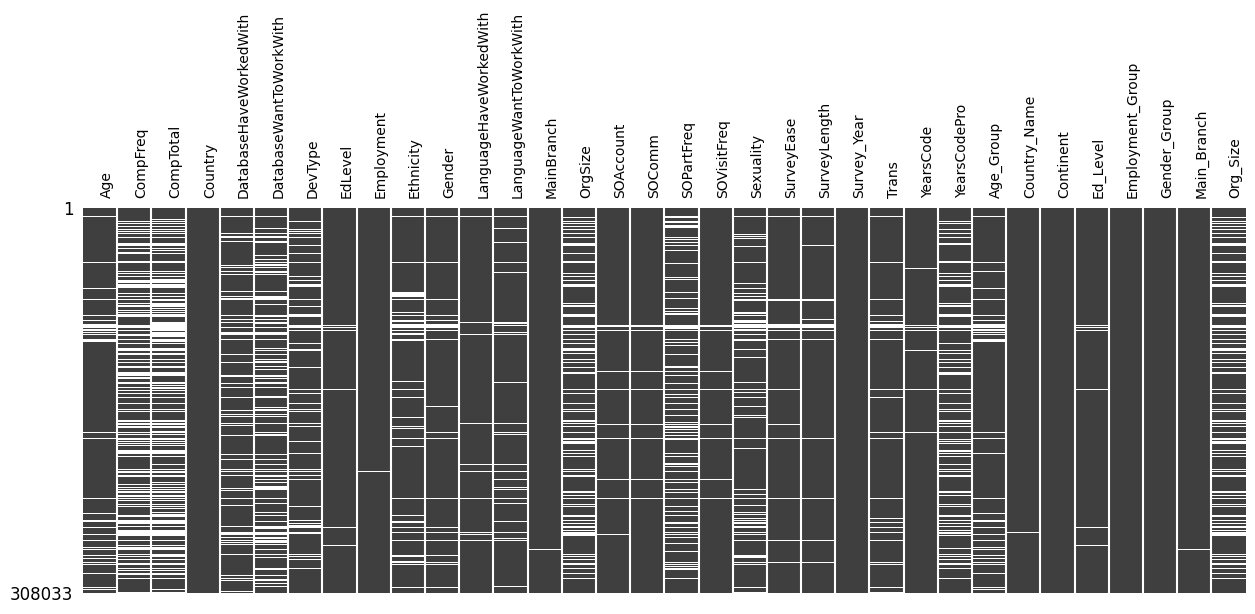

In [50]:
msno.matrix(df, figsize=(15,5), fontsize=10, label_rotation=90, sparkline = False);

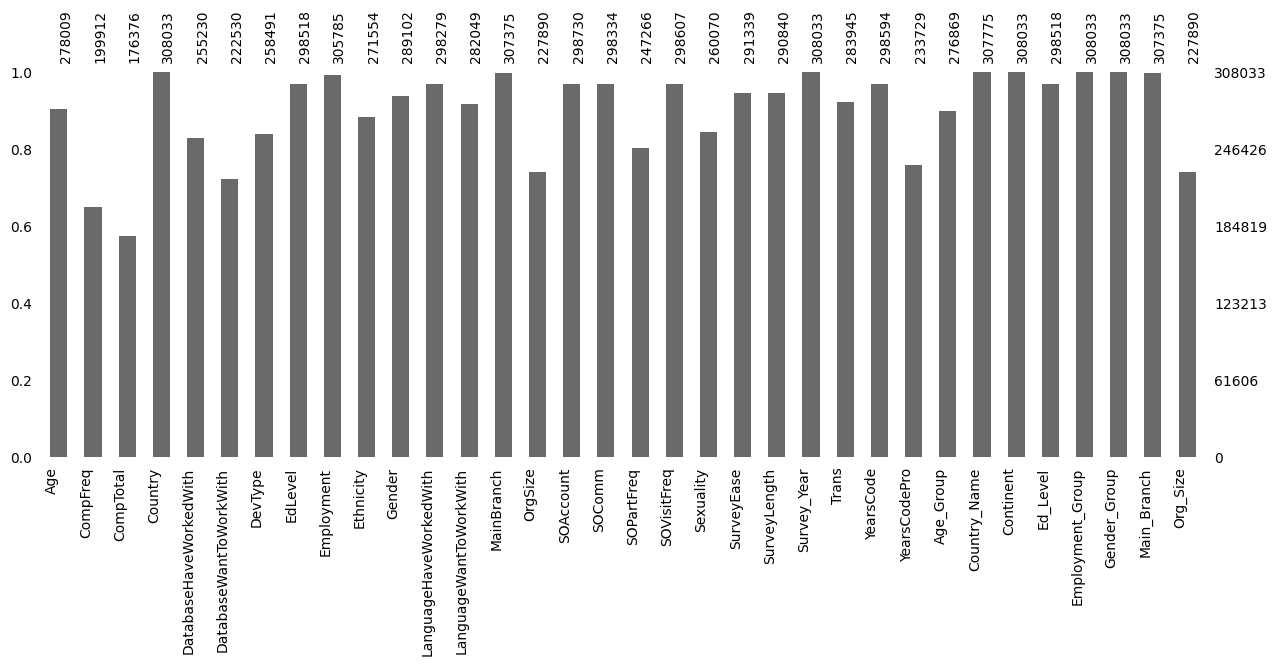

In [51]:
msno.bar(df,figsize=(15,5), fontsize=10, label_rotation=90);

### Demographic and professional data trend
> From pre-processed data set, I checked changes in demographic and professional data in 4 years.

**[FUNCTION]** trend_bar

In [52]:
# Function [trend_bar] to plot bar charts of yearly trend

def trend_bar (var_y, df_name = df, var_x = 'Survey_Year', figsize = (24,8)):
    '''
    INPUT 
    var_y: str, column to be stacked
    df_name: dataframe, dataframe of var_y and var_x, df as default
    var_x: str, 'Survey_Year' as default
    figsize: tuple, the size of charts, (24,8) as default    
    OUTPUT
    - stacked bar chart with absolute values
    - stacked bar chart with relative portions
    '''
    fig = plt.figure(figsize=figsize)
    plt.rcParams['font.size'] = 15
    plt.subplots_adjust(wspace = 0.3)

    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)
    
    # for missing value to be filled with 'UNID' for dist plot
    df_name.fillna({var_y : 'UNID', var_x : 'UNID'}, inplace = True)
    
    ct = pd.crosstab(df_name[var_x], df_name[var_y])
    ax = ct.plot.bar(
        stacked = True, ax = ax1, title = var_y + ' (number of answers)', grid = 'white', alpha = 0.8, rot = 0);
    for c in ax.containers:
        ax.bar_label(c, label_type='center', fmt = '%.0f')
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(reversed(handles), reversed(labels), bbox_to_anchor=(1, 1));

    ct_pct = pd.crosstab(df_name[var_x], df_name[var_y], normalize = 'index')
    ax = ct_pct.plot.bar(
        stacked = True, ax = ax2, title = var_y + ' (%)', grid = 'white', alpha = 0.8, rot = 0);
    for c in ax.containers:
        ax.bar_label(c, label_type='center', fmt = '%.2f')
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(reversed(handles), reversed(labels), bbox_to_anchor=(1, 1));

> Age_Group: the portion of older people with age over 34 and younger people under 18 is increasing,  
while that of age 25 to 34 is showing a decreasing trend (42% in 2019 to 39% in 2022),  
but there is uncertainty with higher portion of UNID (unidentified) answers in 2019 and 2020.  

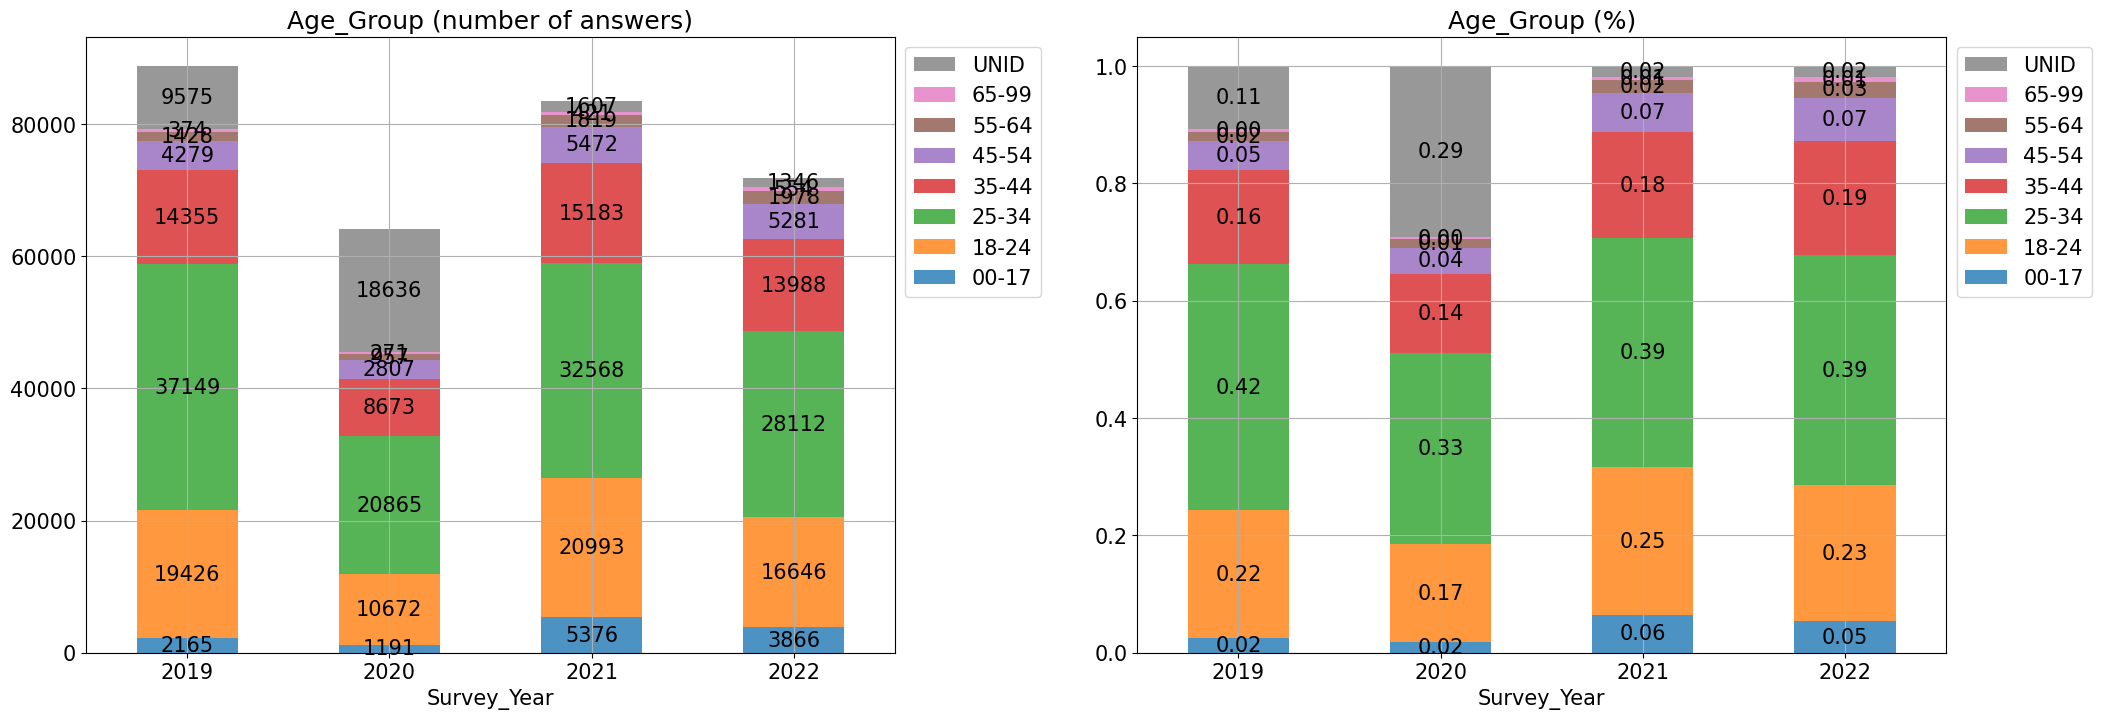

In [53]:
trend_bar ('Age_Group')

> Continent: the portion of Europe is slightly increasing by 3%p, while that of America is decreasing by 4%p. 

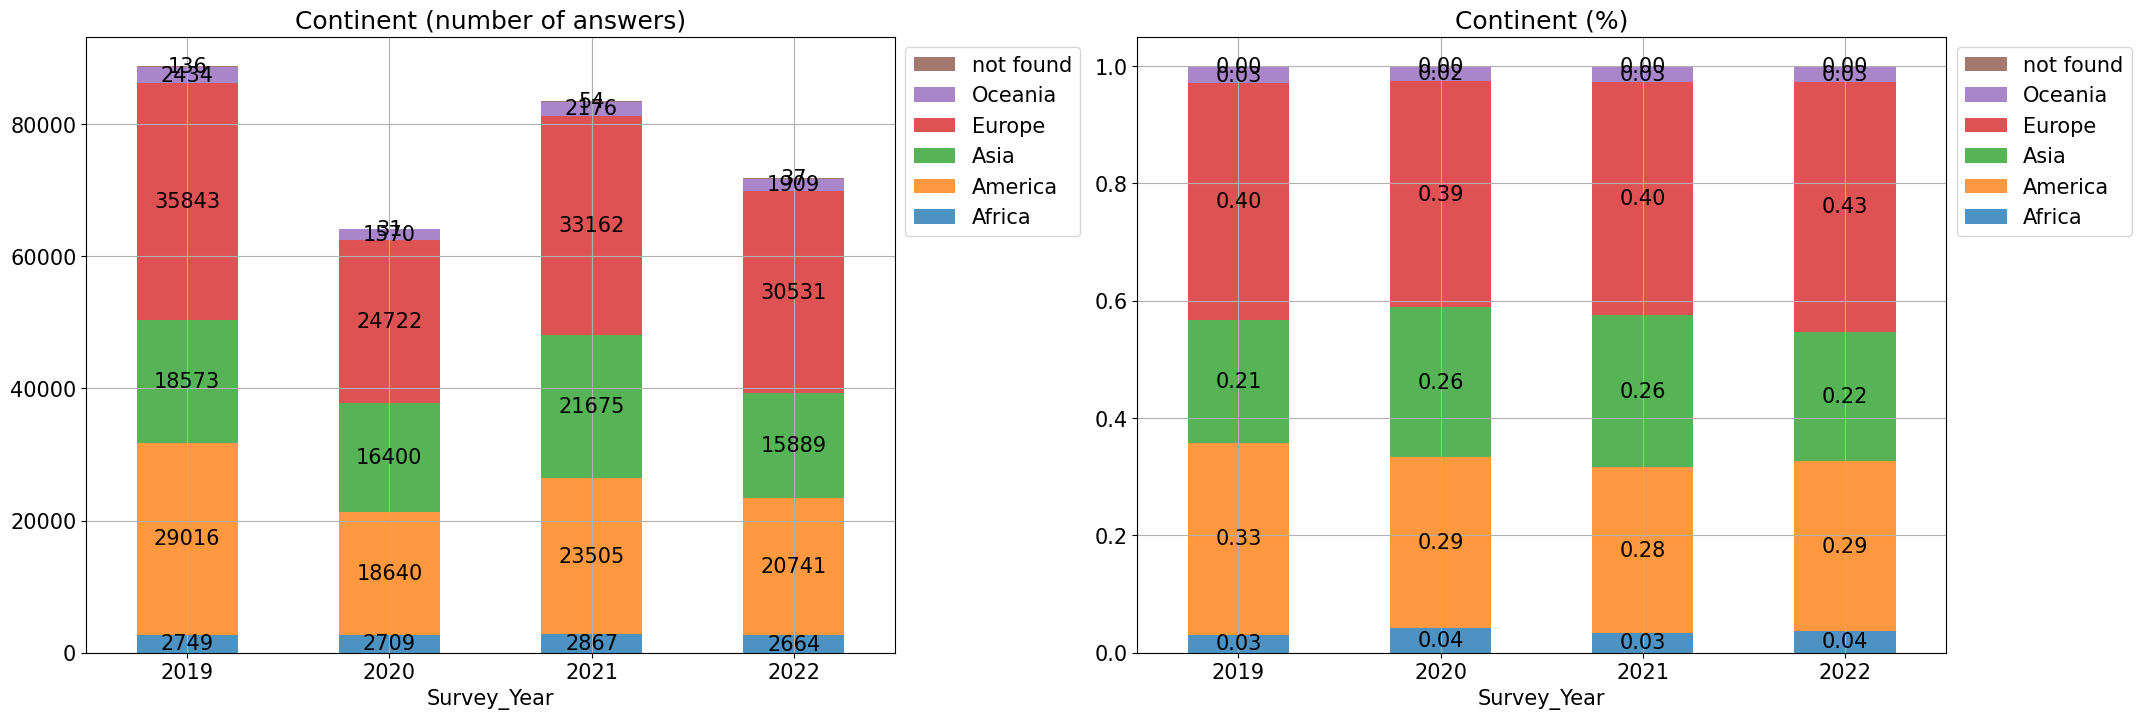

In [54]:
trend_bar('Continent')

> Ed_Level: no significant change is detected.   
> The portion of 'Bachelor's degree' is decreasing, but this can be misread    
> as the meaning of unclear 'Something else' is not clarified.

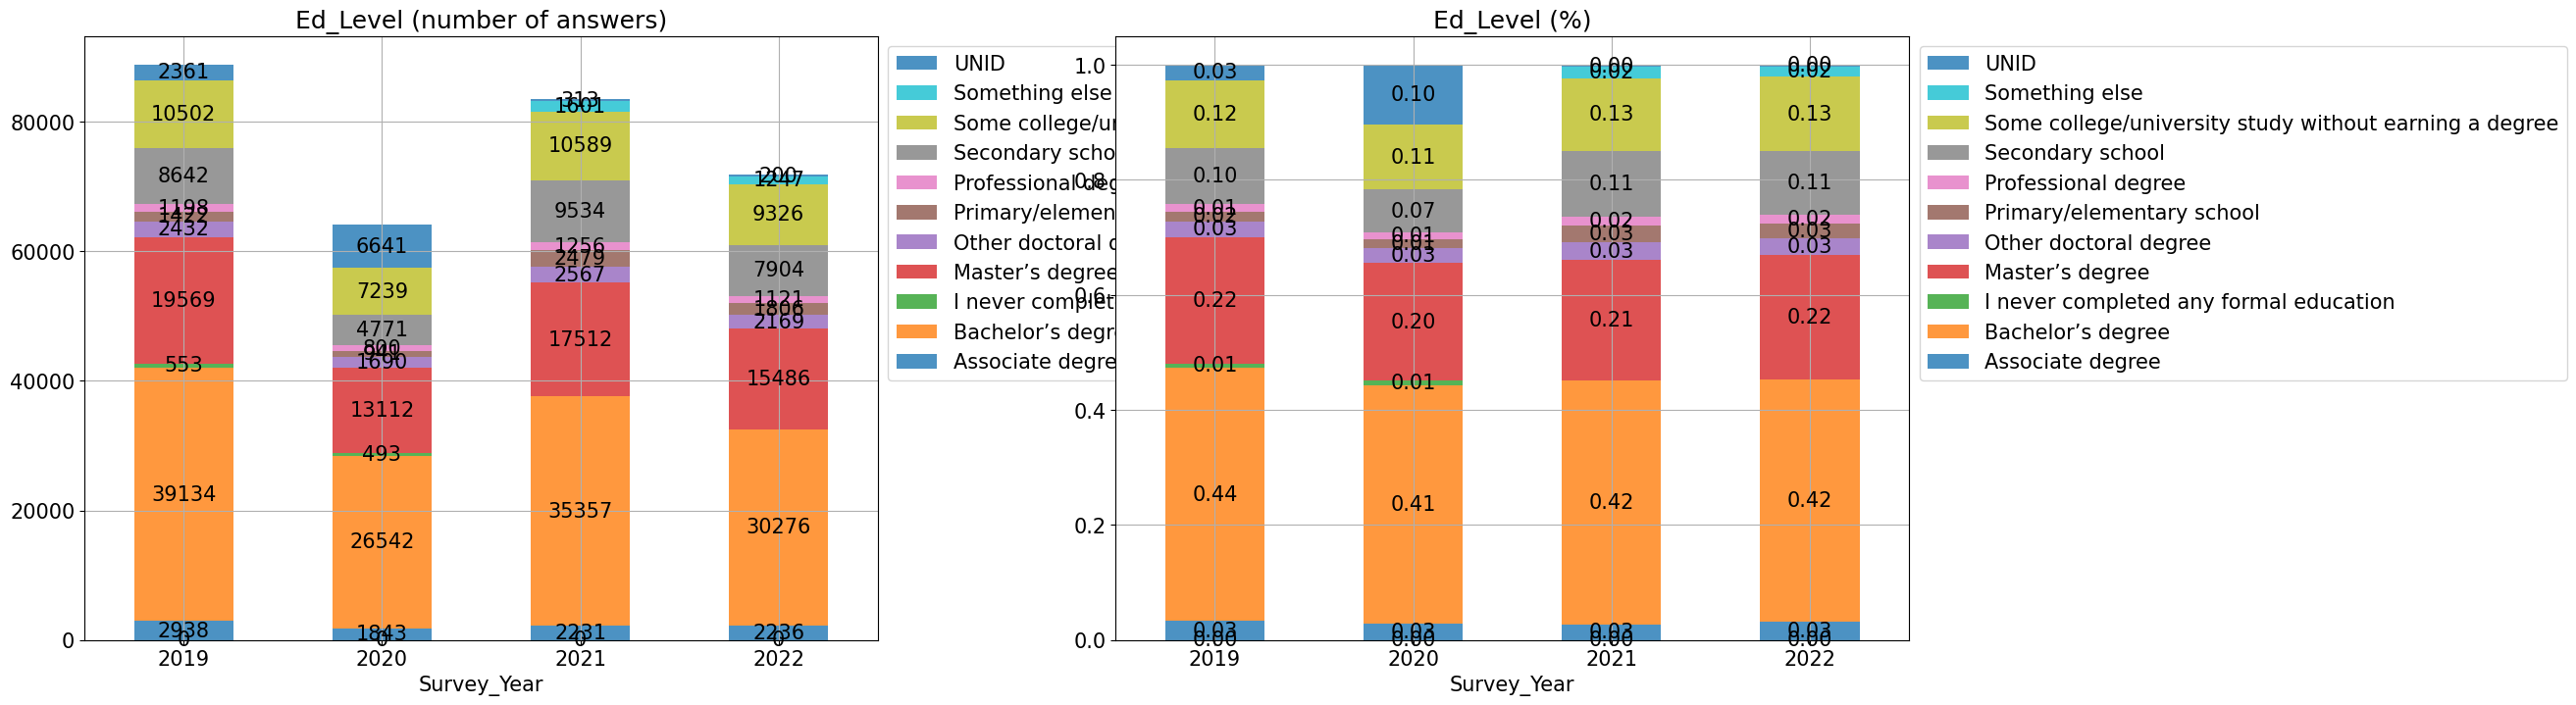

In [55]:
trend_bar('Ed_Level')

> Employment_Group: excluding 2019 where there is no portion of 'Student',  
> we can see the decreasing trend of 'Employed Full-time' and increasing trend    
> of 'Student' and 'Self Employed.'  
> However, similar to Ed_Level, clear conclusion can not be made with 14% of UNID in 2022.  
> This might be due to the situation of unstable macro economy under Covid.

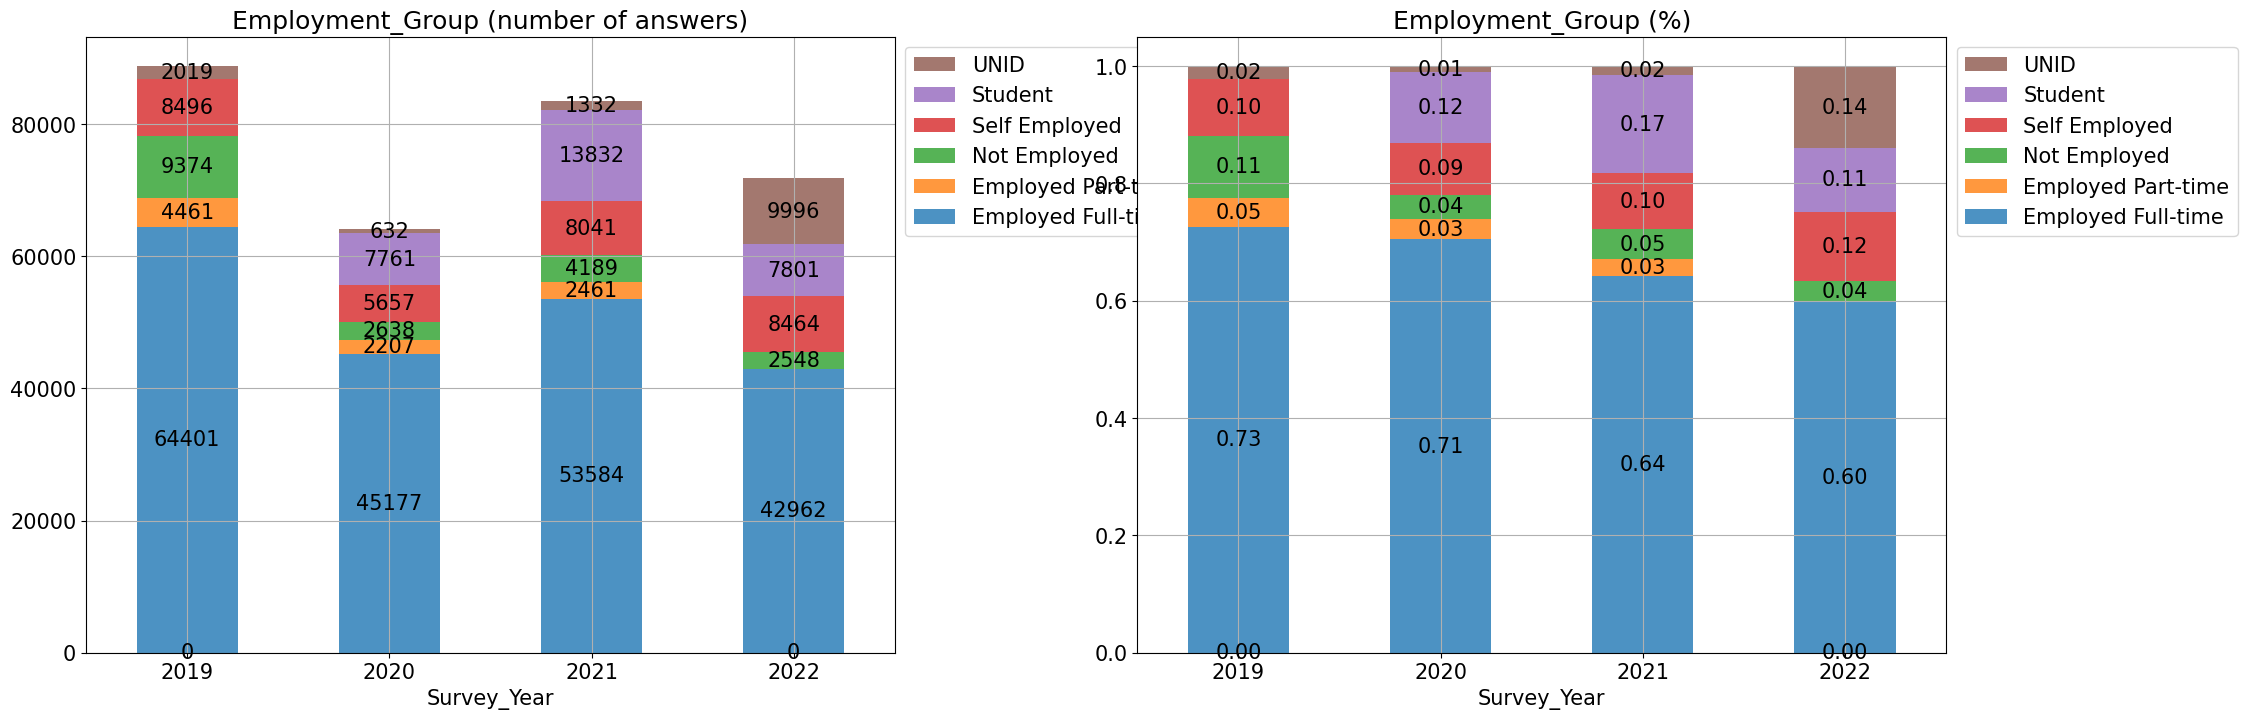

In [56]:
trend_bar('Employment_Group')

> Gender_Group: no significant change is detected. 

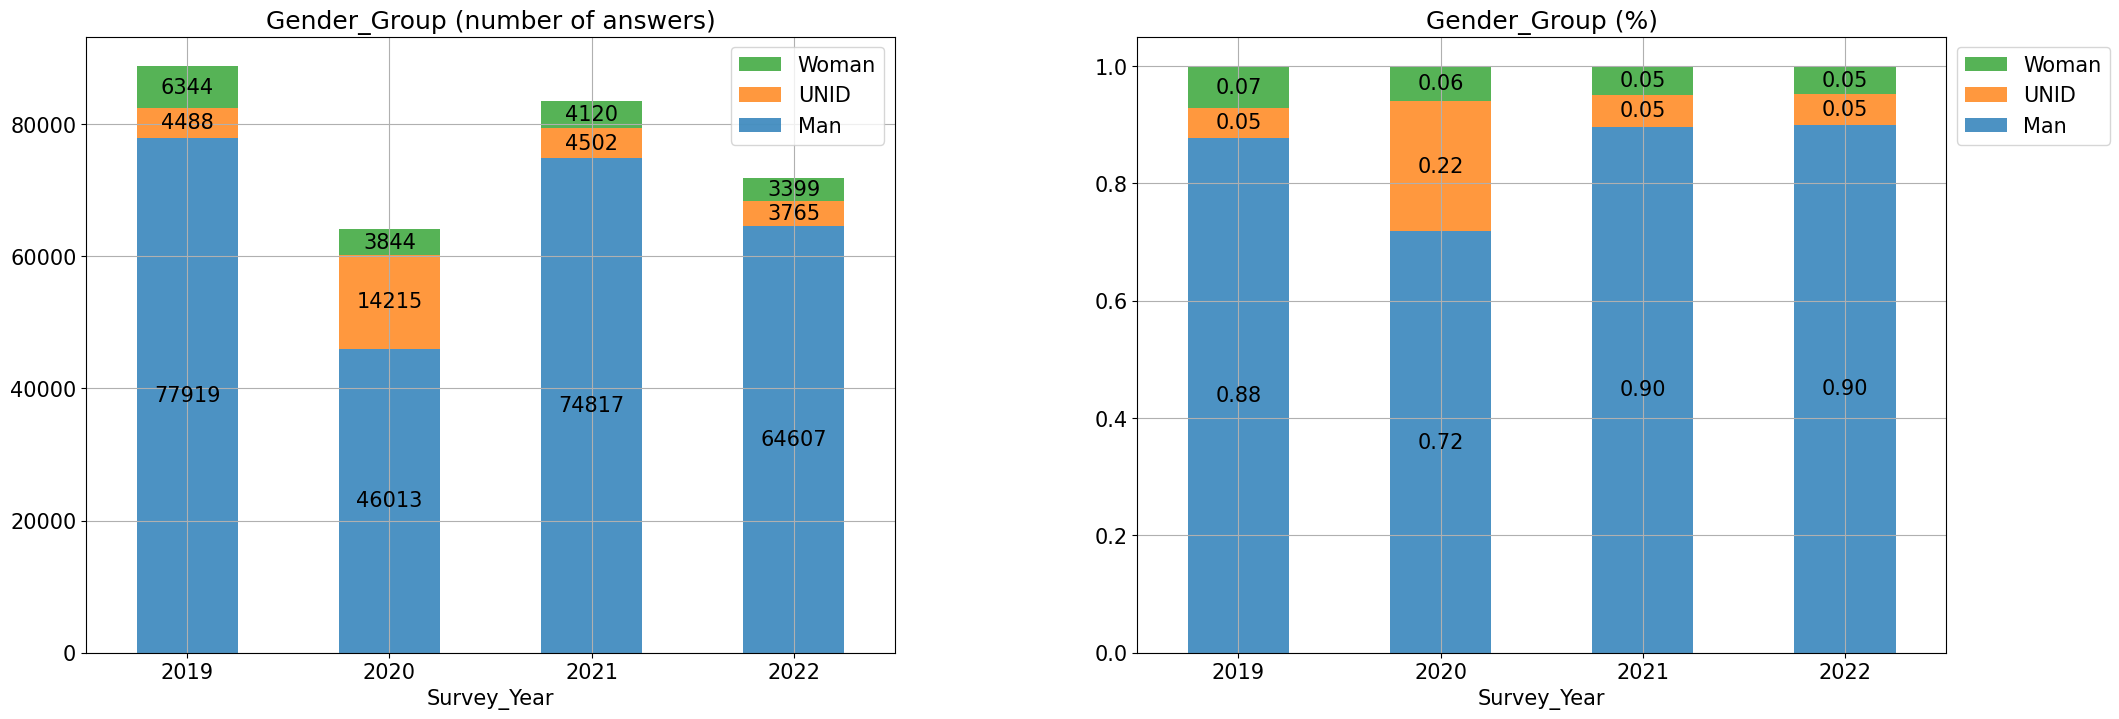

In [57]:
trend_bar('Gender_Group')

> Main_Branch: the portion of 'Professional Developer' stays at 75% level.     
An interesting point is that Coding as Hobby in 2022 has increased by 3%p   
compared to 2019, but combined with Learning to Code, the total portion     
of amateur programmers seems at the same 15% to 16% level.

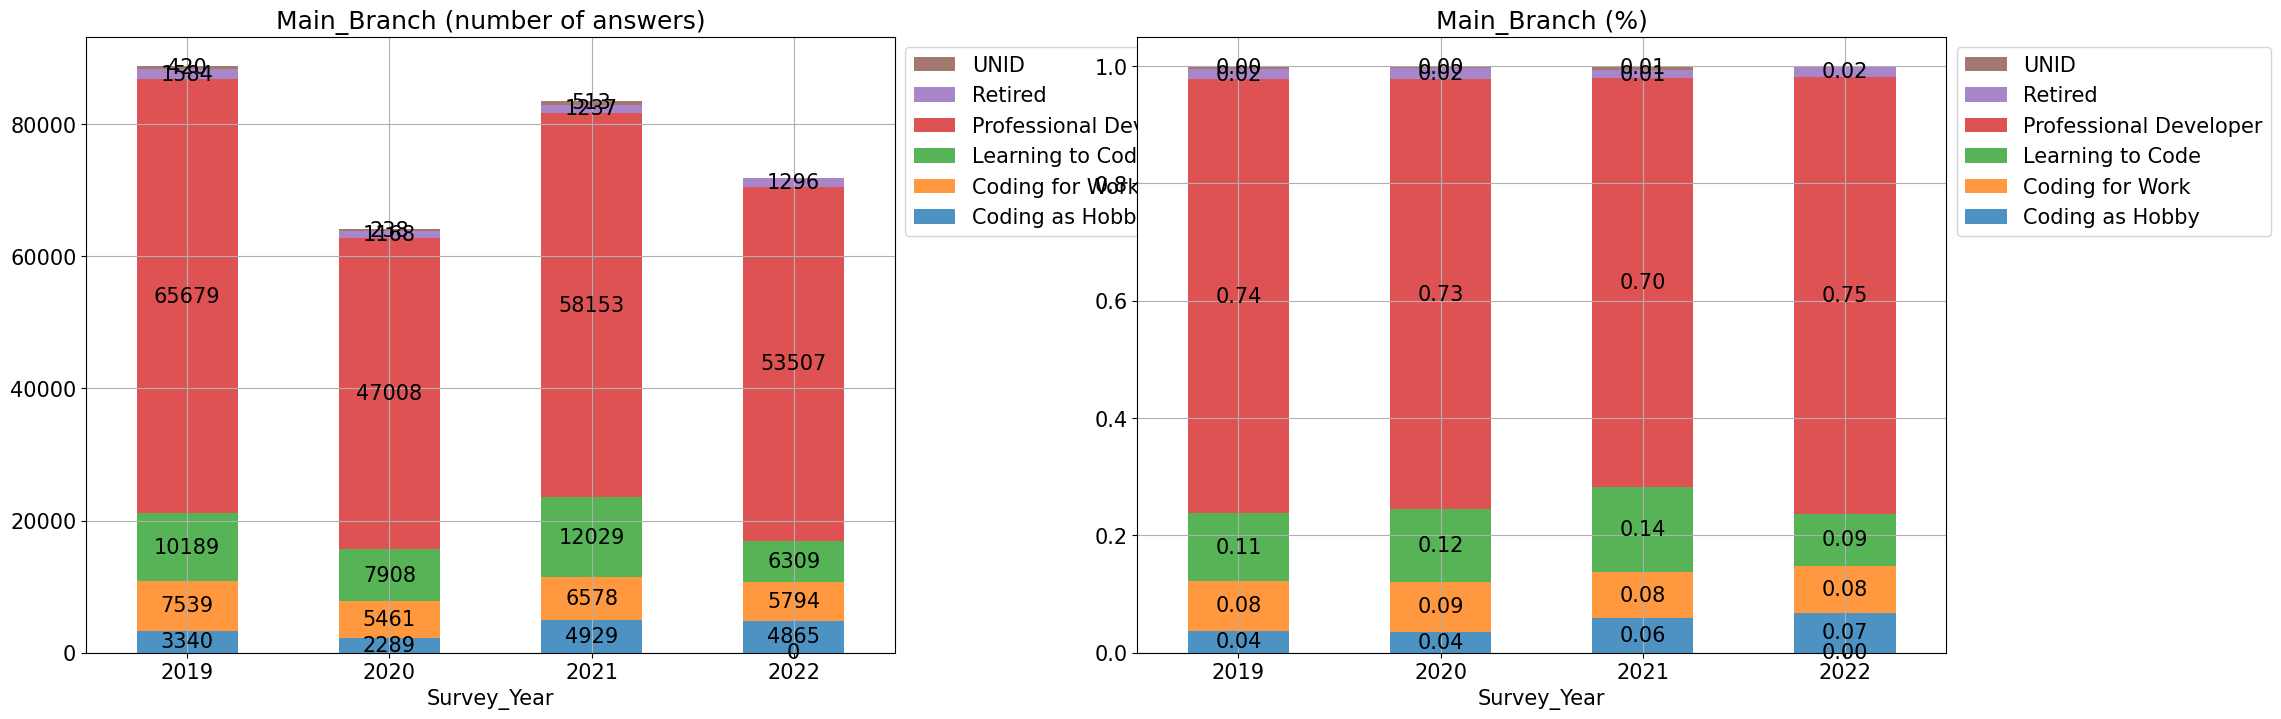

In [58]:
trend_bar('Main_Branch')

> Org_Size: it is likely that the portion of people working in organizations   
under 500 employee is decreasing when 2022 is compared to 2019.  
But as the portion of UNID (unidentified) answer is becoming higher,     
it is reasonable to conclude that no significant change is detected. 

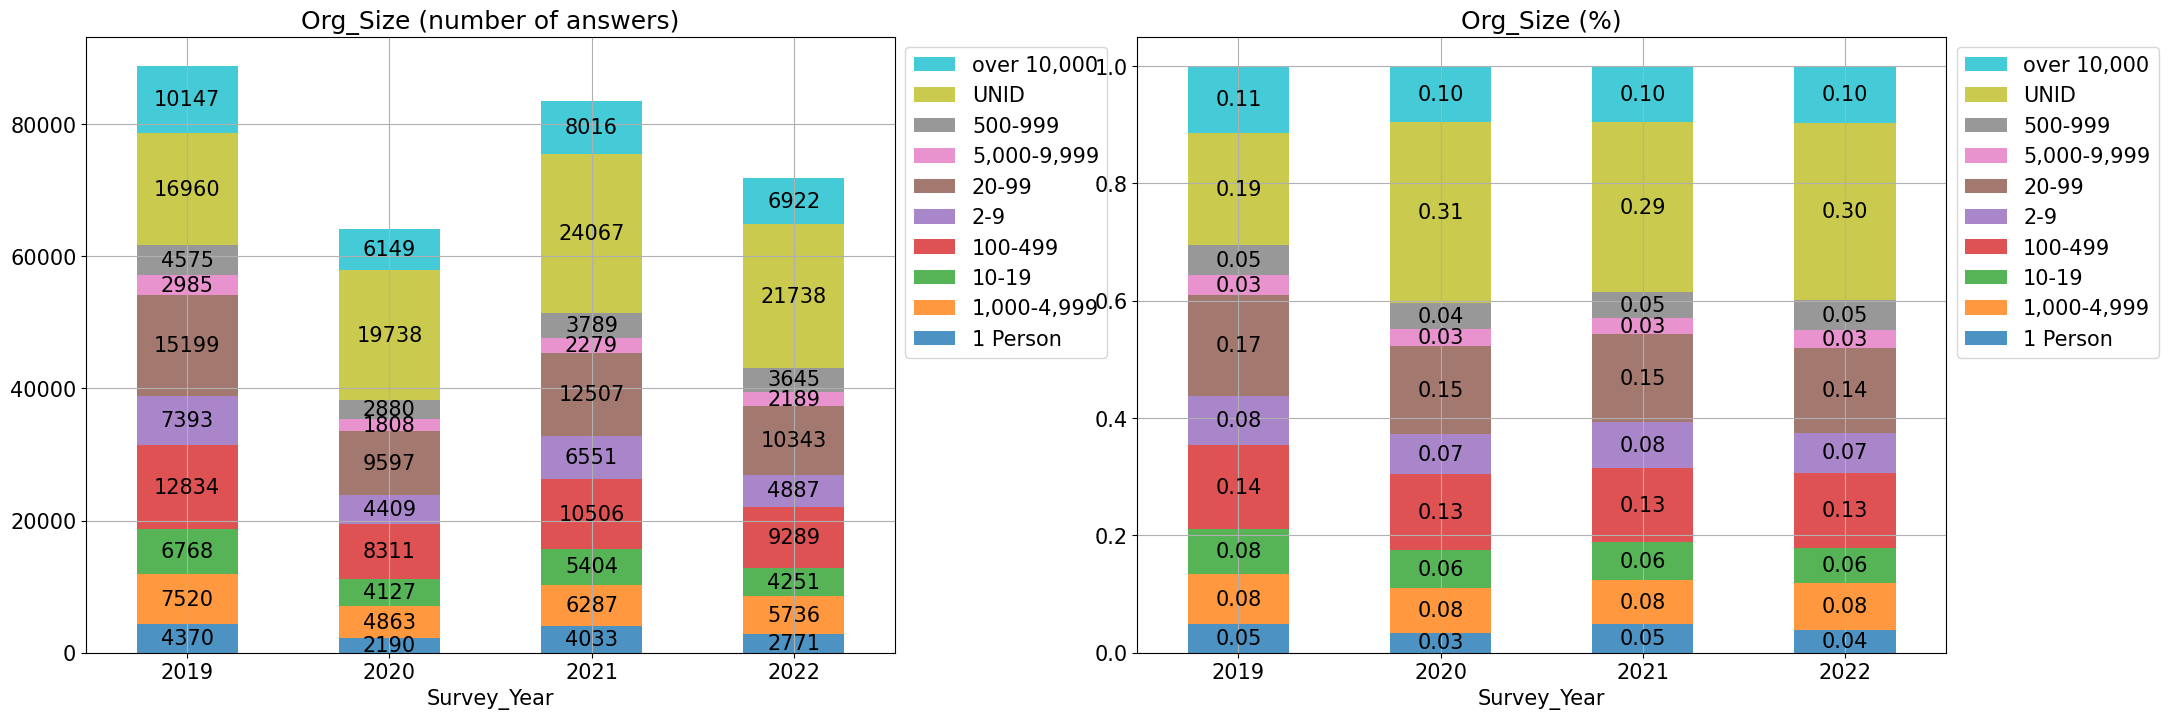

In [59]:
trend_bar ('Org_Size')

> **Overall changes of demographic and professional characteristics of survey participants**
> - The portions of survey participants in Europe, Asia and Africa are    
> slightly increasing while that of America is decreasing   
> - In gender there is no significant change with man about 90% and woman about 5%.   
> - In the question of whether coding is a main profession, the answer of yes stays at 75%.     
> The portion of amateur programmers (Learning to Code and Coding as Hobby) is also     
> at the same 15% to 16% level.
> - For age, education level, employment status, the size of organizations    
> where participants are working, there are huge uncertainty from changing high portion     
> of no answers (marked as UNID - unidentified), that I made no conclusion

### Language-related data trend
> As these data have answers of multiple choice, proper analysis using original data  
> is almost impossible.  
> Therefore I multiplicated each row of data frame to the number of values   
> to check the frequency of each value and relationship with other pre-processed variables.

**[FUNCTION]** multiplicate_df

In [60]:
# Function [multiplicate_df] to muliplicate rows of a dataframe
# to the total counts of single values of a designated column
# which is containing cells of concatenated values.

def multiplicate_df (concat_val_col, col_for_analysis, base_df = df):
    '''
    INPUT
    concat_val_col: str, name of column containing cells of concatenated values
    col_for_analysis: list, columns to be used for analysis, default as processed_columns
    base_df: name of dataframe to be multiplicated, default as df
    OUTPUT
    dataframe of multiplicated rows to the total counts of single values of concat_val_col 
    '''
    col_list = col_for_analysis.copy()
    col_list.append(concat_val_col)
    dfm = base_df[col_list]
    
    # Sub-Function of multiplicate_df to return the number of concatenated values in a cell
    def number_of_values (cell_value):
        '''
        INPUT - cell_value: cell value / OUTPUT - number of concatenated values is a cell
        '''
        try:
            return len(re.split('[,;]',cell_value))
        except:
            return 1
    
    dfm[concat_val_col] = dfm[concat_val_col].str.lower()
    dfm['number_of_values'] = dfm[concat_val_col].apply(number_of_values)   
    df_mul = dfm.loc[dfm.index.repeat(dfm.number_of_values)].reset_index(drop = True)
    
    one_value_list = []
    for i in dfm[concat_val_col]:
        try:
            devided_contents = re.split('[,;]', i)
            for j in devided_contents:
                one_value_list.append(j)
        except:
            one_value_list.append(i)
    df_one_val = pd.DataFrame(one_value_list, columns = ['one_value'])
    
    df_mul = pd.concat([df_mul, df_one_val], axis = 1).sort_values(
        by = ['one_value']).reset_index(drop = True)
    
    return df_mul

In [61]:
# list of columns pre-processed and to be used for further analises
processed_columns = [
    'Survey_Year', 'Age_Group', 'Continent', 'Ed_Level',
    'Employment_Group', 'Gender_Group', 'Main_Branch', 'Org_Size']

In [62]:
# make list of multiplicated dataframes
col_to_mul = [
    'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 
    'LanguageHaveWorkedWith', 'LanguageWantToWorkWith']

mul_df_name = ['db_now', 'db_future', 'lan_now', 'lan_future']

mul_DB_list = []

for i, j in zip(col_to_mul, mul_df_name):
    globals()[j] = multiplicate_df(i, processed_columns, df)
    globals()[j].name = j
    globals()[j].rename(columns={'one_value':j}, inplace = True)
    mul_DB_list.append(globals()[j])

> Database: the portions of 'redis', 'postgresql' and 'mongodb' are increasing    
> while 'mysql' and 'microsoft sql server' are decreasing.  
> This trend is continuing in future preference.

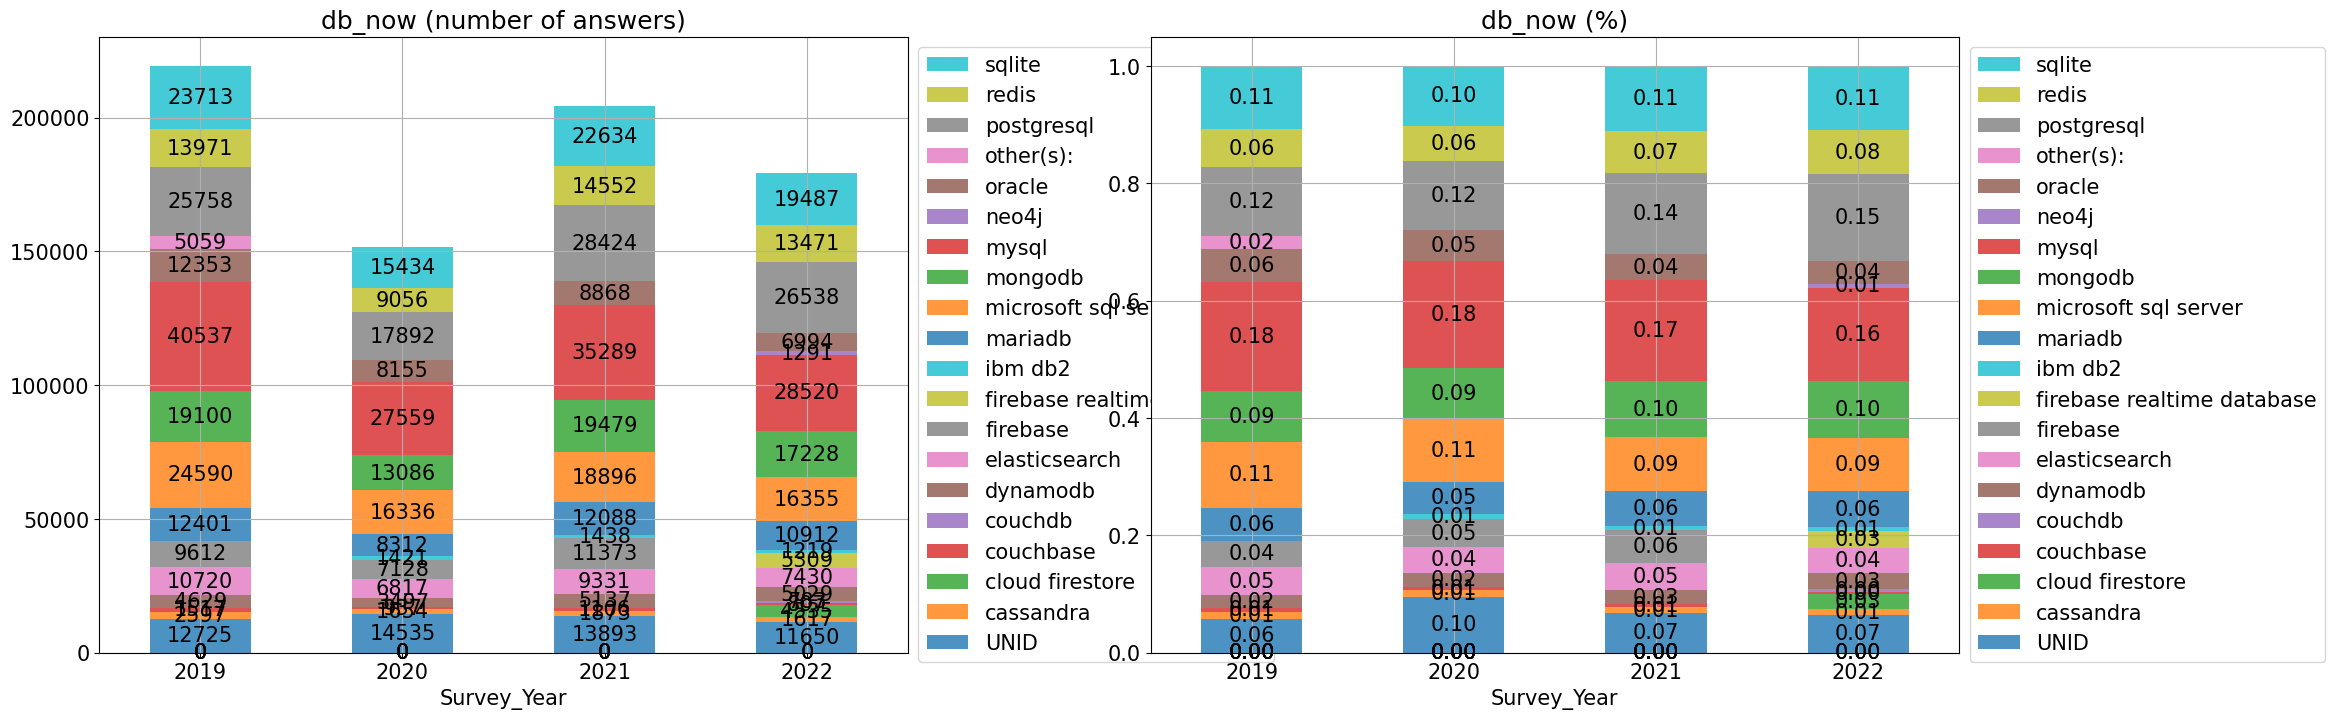

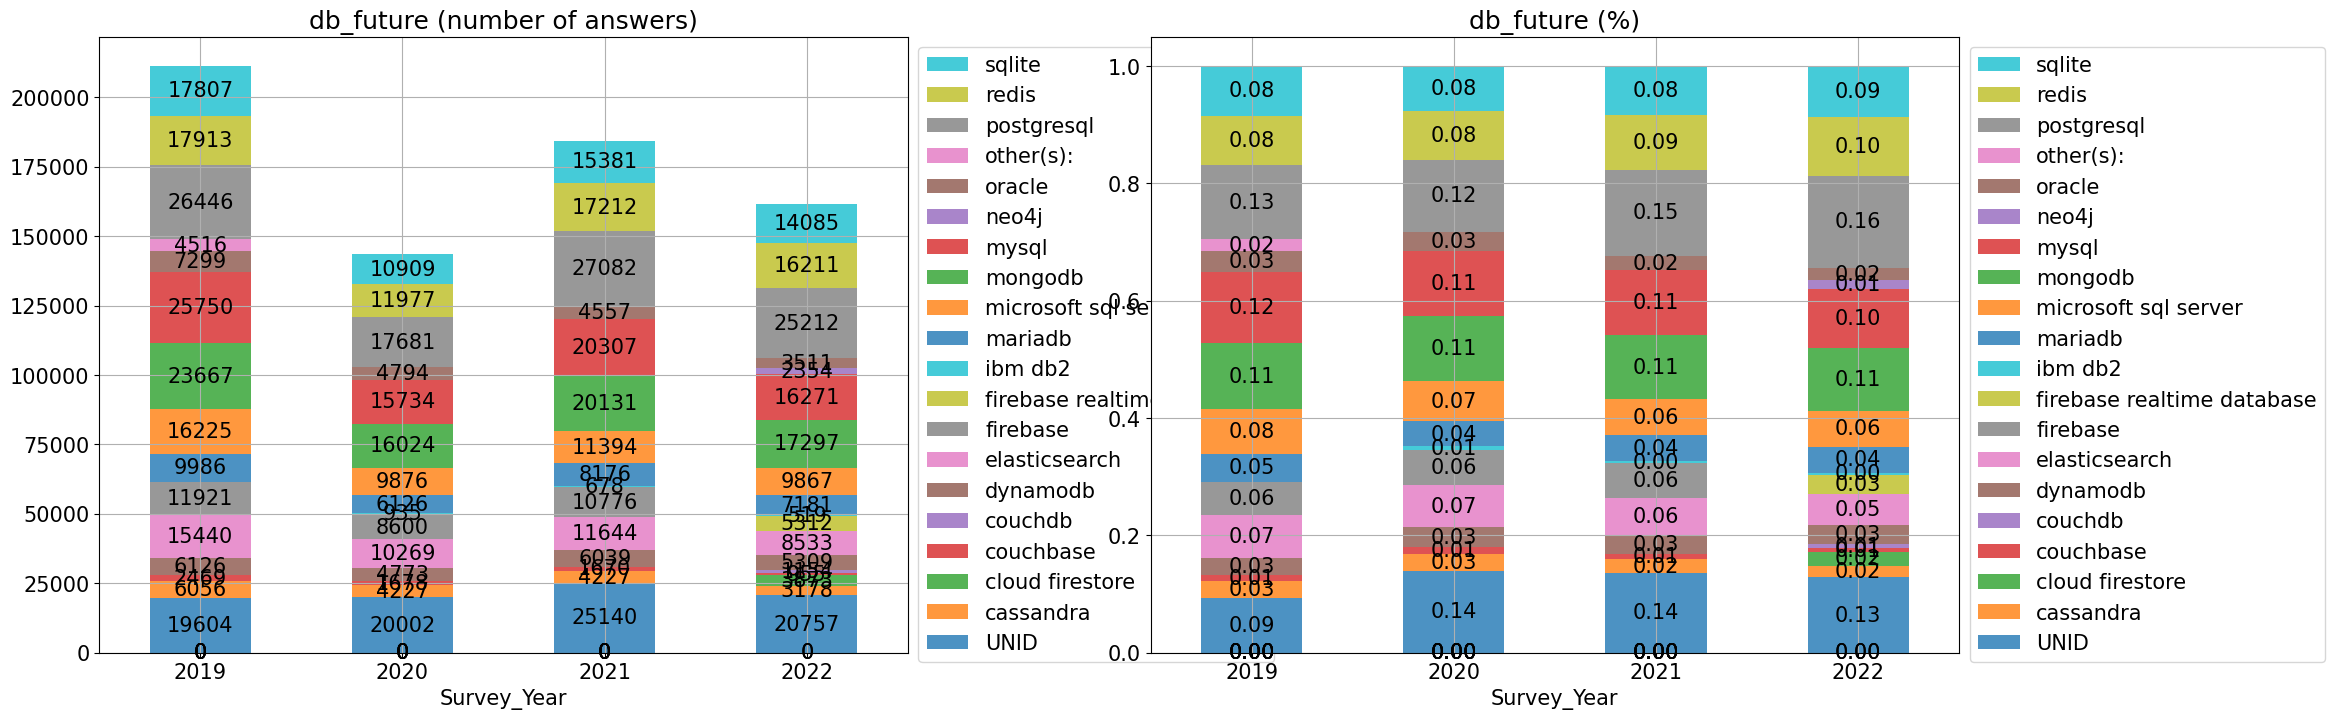

In [63]:
trend_bar ('db_now', db_now)
trend_bar ('db_future', db_future)

> Language: the portions of 'typescript', 'python' and 'bash,etc.' are increasing,     
> while 'sql', 'ocaml', 'C++' and 'C#' are  decreasing.  
> In future preference, 'typescript' is further increasing.

In [64]:
# adjust grouping of some languages
lan_now.lan_now.replace(['bash/shell', 'powershell'],
                        'bash/shell/powershell', inplace = True)
lan_future.lan_future.replace(['bash/shell', 'powershell'],
                        'bash/shell/powershell', inplace = True)

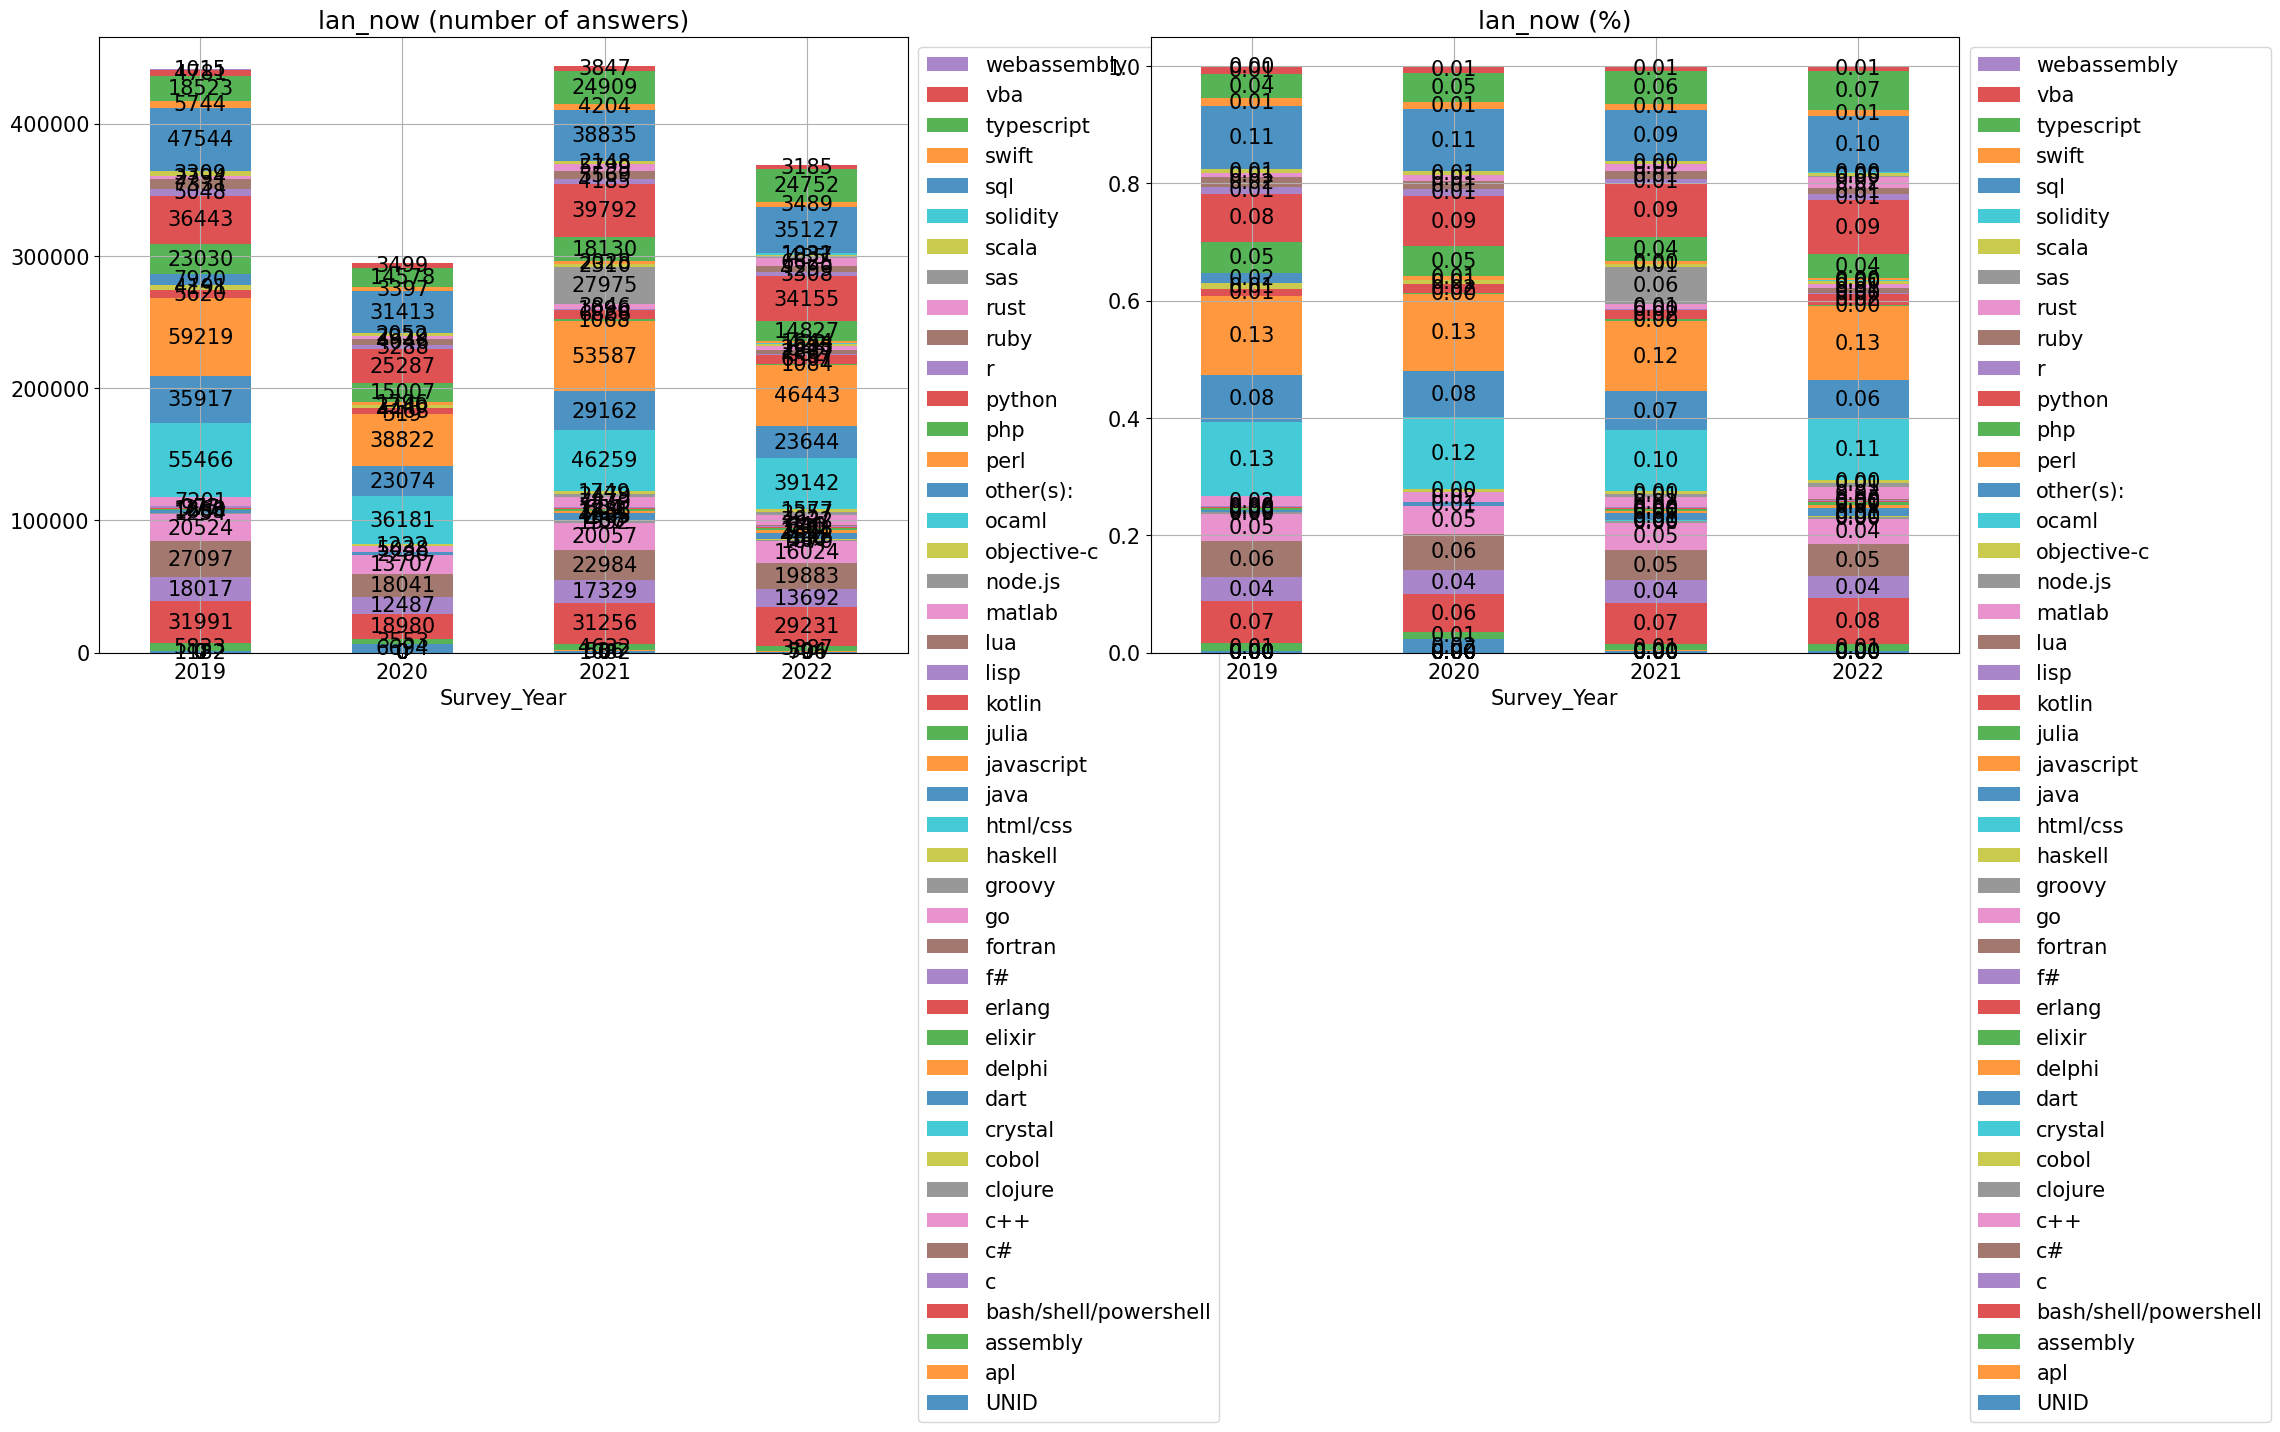

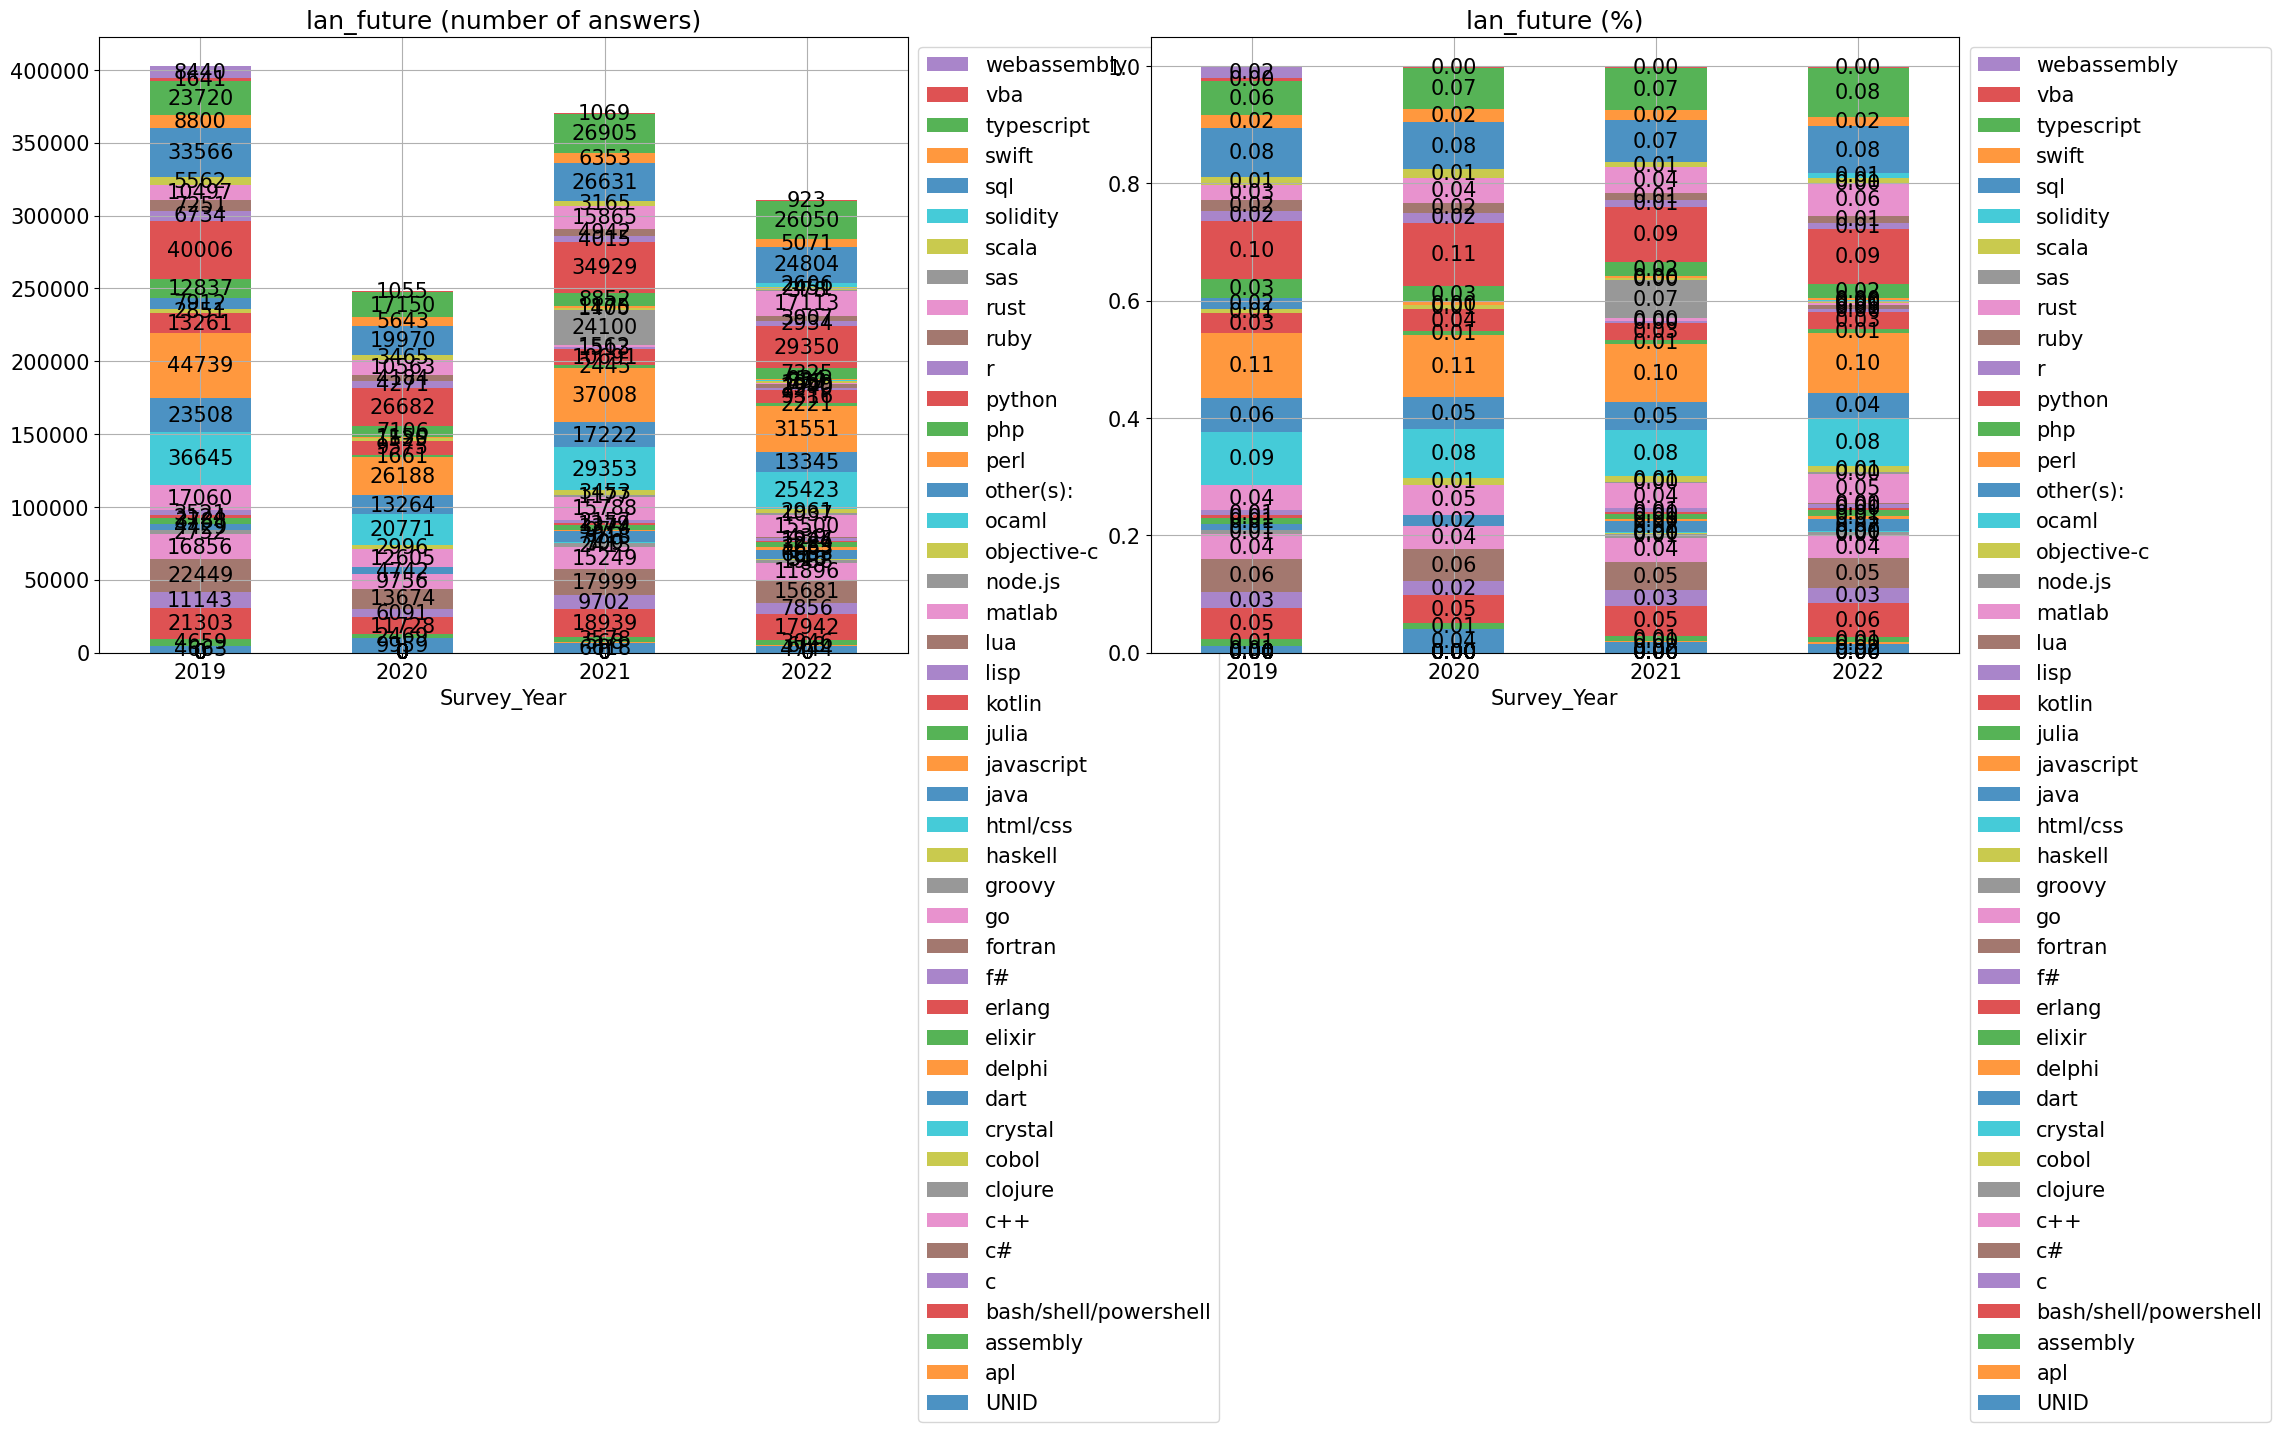

In [65]:
trend_bar ('lan_now', lan_now)
trend_bar ('lan_future', lan_future)

> **Programing languages preferred over time**
> - In database languages, the portions of 'redis', 'postgresql' and 'mongodb' are increasing,    
> while 'mysql' and 'microsoft sql server' are decreasing.  
> This trend is continuing in future preference.  
> - In programing languages, the portions of 'typescript', 'python' and 'bash,etc.' are increasing,   
> while 'sql', 'ocaml', 'C++' and 'C#' are  decreasing.  
> In future preference, 'typescript' is further increasing.

### Deep-dive on language-related data
> I have checked yearly trends of variables above.   
> There are slight changes in trends and drastic moves are hardly found,  
> that I proceeded further analyses on variables showing changes  
> by 2 dimension plotting on year 2019 and 2022.

In [66]:
# variables to procees 2D plotting with
db_change  = [db_future, lan_future]
vars_change_y = ['db_future', 'lan_future']
vars_change_x = ['Age_Group', 'Continent']

> **Future Preference of DB by Age**:  
> About future preference on DB,  
> 'postgresqu' shows 3%p increase mainly driven by age 25 to 44.   
> 'redis' also shows 2%p increase, and its future seems to be even better with drastic increase in Age under 18.  
> 'sqlite' increased preference by 1%p but its base moved to older generation.  
> 'mongodb' stays at 11% preference, but younger generation's support on this language is notable.  

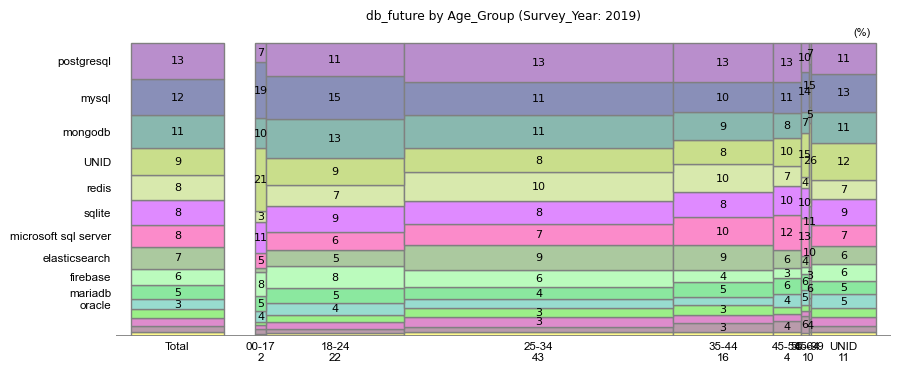

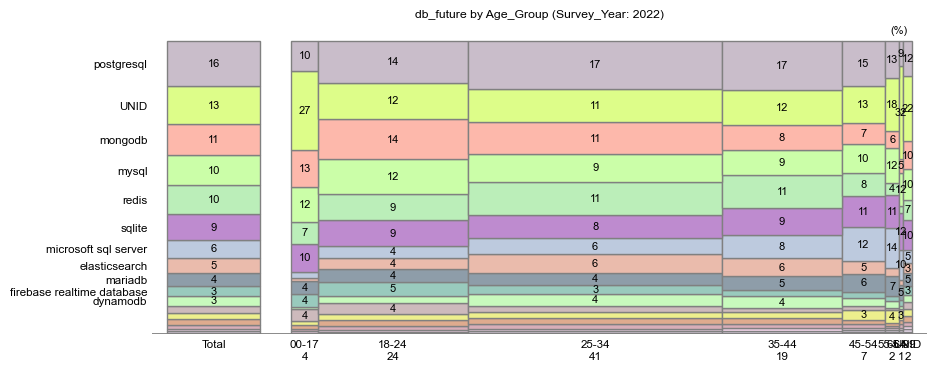

In [67]:
for l in ['2019', '2022']:
    moz.chart(db_change[0], vars_change_y[0], vars_change_x[0], 'Survey_Year', l, (10, 4))

> **Future Preference of DB by Continent**:  
> About future preference on DB,  
> 'postgresqu' is gaining preference more in America and Europe.   
> The popularity of 'redis' and 'sqlite' are more evenly distributed in 3 main regions.    
> 'mysql' is losing its share in all regions.

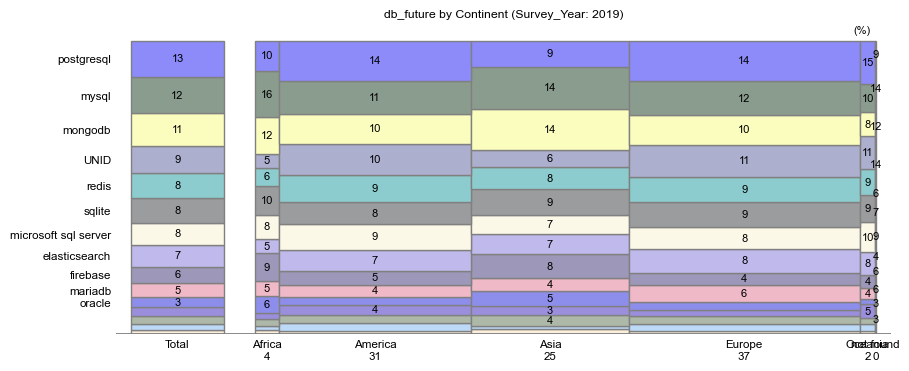

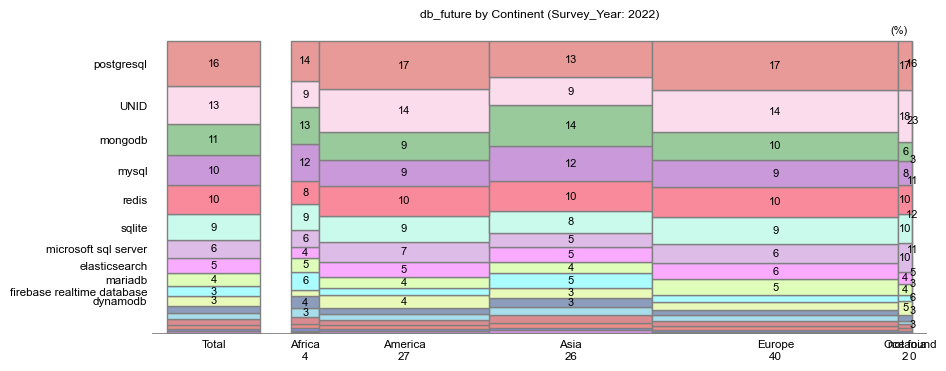

In [68]:
for l in ['2019', '2022']:
    moz.chart(db_change[0], vars_change_y[0], vars_change_x[1], 'Survey_Year', l, (10, 4))

> **Future Preference of Language by Age**:  
> About future preference on languages,  
> 'typerscript' shows 2%p increase mainly driven by age under 25.   
> 'javascript' and 'html/css' are losing shares in all ages.  
> 'sql' is becoming the language of older people with its share staying at 8%.

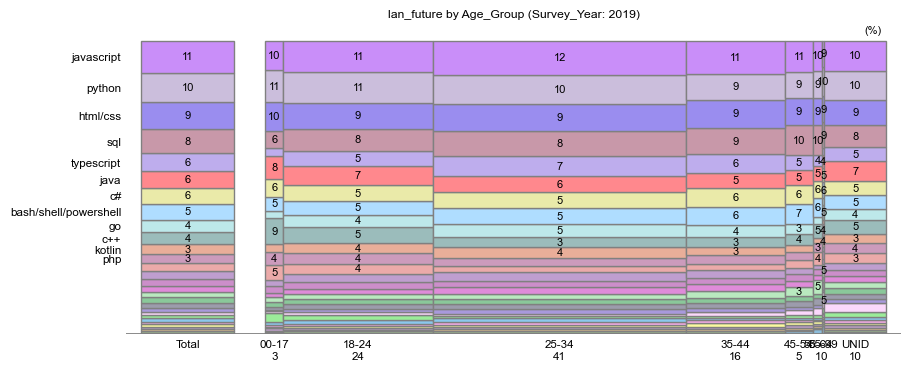

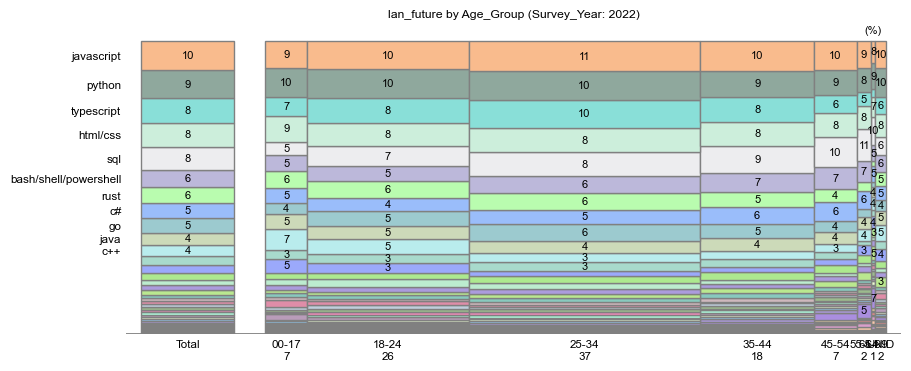

In [69]:
for l in ['2019', '2022']:
    moz.chart(db_change[1], vars_change_y[1], vars_change_x[0], 'Survey_Year', l, (10, 4))

> **Future Preference of Language by Continent**:  
> About future preference on languages,  
> 'typerscript' is gaining popularity in all regions.    
> 'javascript', 'html/css' and 'sql' are losing shares in most regions.  

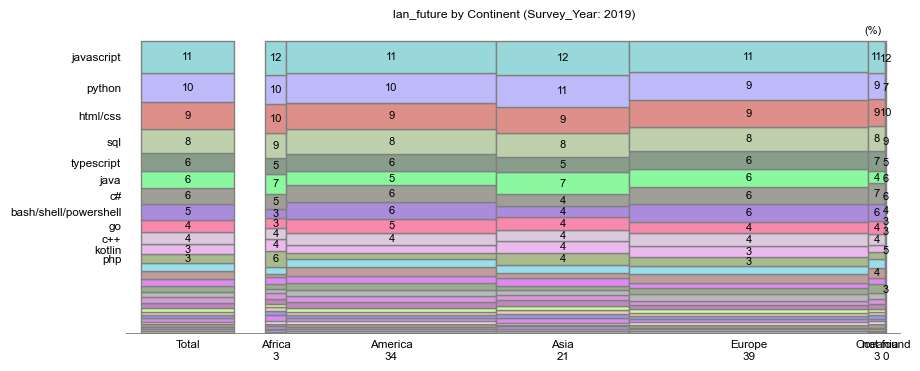

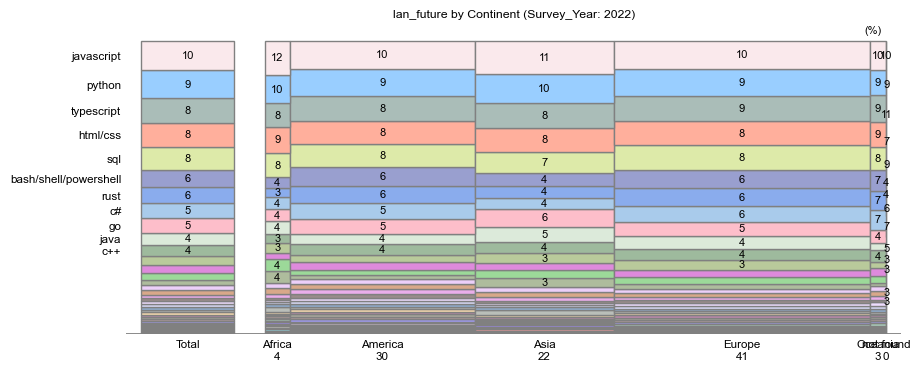

In [70]:
for l in ['2019', '2022']:
    moz.chart(db_change[1], vars_change_y[1], vars_change_x[1], 'Survey_Year', l, (10, 4))

> **Difference in programing language preference by global region and generation**   
> 
> About future preference on DB languages, 
> * ’postgresqu' is gaining preference more in America and Europe.   
> * The popularity of 'redis' and 'sqlite' are more evenly distributed in 3 main regions.     
> * 'mysql' is losing its share in all regions.   
> 
> In terms of age,    
> * 3%p increase of 'postgresqu' is mainly driven by age 25 to 44.    
> * The future of 'redis' seems to be even better with drastic increase in Age under 18,     
> * 'sqlite' preference is moving to older generation.    
> * 'mongodb' stays at 11% preference, but younger generation's support on this language is also notable.  
>
> About future preference on programing languages, 
> * 'typerscript' is gaining popularity in all regions.    
> * ‘javascript' and 'html/css' are losing shares in most regions. 
>
> In terms of age,    
> * 'typerscript' shows 2%p increase mainly driven by age under 25.   
> * 'javascript' and 'html/css' are losing shares in all ages.  
> * 'sql' is becoming the language of older people with its share staying at 8%.